
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1378  0.109500    0.004444  0.762500                4.204430   
1379 -0.116500    0.008900  0.646000                4.208539   
1380  0.008667   -0.037618  0.654667                4.212648   
1381 -0.063000   -0.014340  0.591667                4.217784   
1382  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1378          2169.361647            9297.484543   185.046491   
1379          2169.079601            9312.779010   185.053796   
1380          2168.797556            9303.753420   185.007919   
1381          2168.444999            9333.448101   184.942435   
1382          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
0                       0.0           0.0           0.354        0.16   
1                       0.0           0.0           0.313        0.83   
2                       0.0           0.0           0.360        0.10   
3                       0.0           0.0           0.319        0.34   
4                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1378                    0.0           0.0           0.343        0.30   
1379                    0.0           0.0           0.324        0.30   
1380                    0.0           0.0           0.325        0.16   
1381                    0.0           0.0           0.335        0.26   
1382                    0.0           0.0           0.328        1.08   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
0               21.080431             18.313322             4.131228   
1               20.996415             18.311768             4.133911   
2               20.749627             18.341701             4.137632   
3               20.609259             18.644476             4.142824   
4               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1378            21.039583             18.308225             4.129485   
1379            21.043999             18.308776             4.129674   
1380            21.048415             18.309327             4.129862   
1381            21.053935             18.310016             4.130097   
1382            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
0               54.940123    171.769513    182.533770    148.126483   
1               55.072779    170.595469    183.725050    148.161842   
2               55.375043    167.017421    195.812061    147.562523   
3               55.341884    154.214917    188.028883    147.807509   
4               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1378            55.162782    167.619915    185.900341    148.103530   
1379            55.162767    164.706552    182.408576    148.106012   
1380            55.140373    166.903493    181.684649    148.108493   
1381


## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )

        ############################################
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
        
        ## Curve_SIMs = tsGPT_obj.MySoftmax(  Curve_SIMs[ [ 0, 3] ]  )
        loss = (0.00001)*loss_SI + Curve_SIMs[3]               
        

       
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( 0 ) # loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 200 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print( [ loss_SI , loss_all ] )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  28.412845611572266
seq length of pred =  30
[ 3.52351928  2.20061077 16.03183166 28.41283053  0.79606926  0.50930081]
[tensor(1.5921, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1300, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  28.056396484375
seq length of pred =  30
[ 3.70421483  2.17594417 16.44583782 28.05638105  0.79324109  0.50171157]
[tensor(1.5865, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1323, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  28.381572723388672
seq length of pred =  30
[ 3.46944201  2.15545524 16.30806989 28.38155803  0.80510196  0.50954592]
[tensor(1.6102, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1361, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  27.754404067993164
seq length of pred =  30
[ 3.63901772  2.12012754 15.92493692 27.75438866  0.77662704  0.49880192]
[tensor(1.5533, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1097, device='cuda:0'

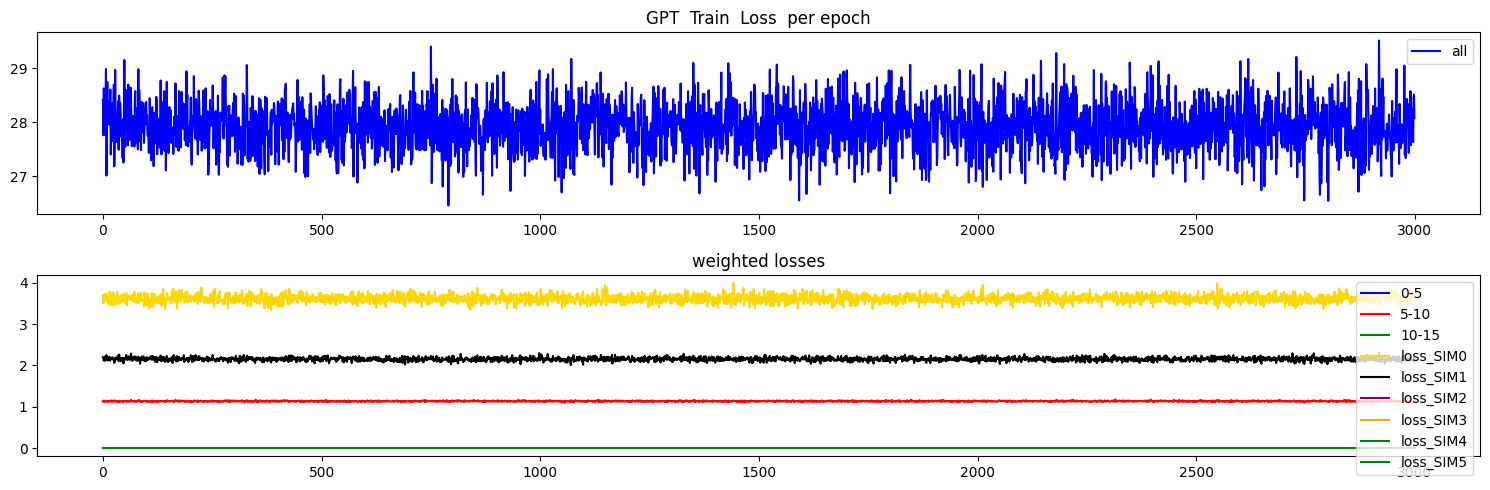

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.1360468715429306
Test MSE Loss - SI only 0-5:  0.09175979346036911
Test MSE Loss - SI only 5-10:  0.17001523077487946
Test MSE Loss - SI only 10-15:  0.20219692587852478
mae, mse, rmse, mape, mspe, rse, corr
(0.30715314, 0.13604687, 0.3688453, 2.2589834, 9.02212, 1.2072042)
Testing R**2 - SI only:  -0.4573421758740712
Testing R**2 - SI only:  -0.4573421758740712
Testing R**2 - All features:  0.9600349366776552
Testing R**2 - (f2) - SI full:  -0.5804936035978512


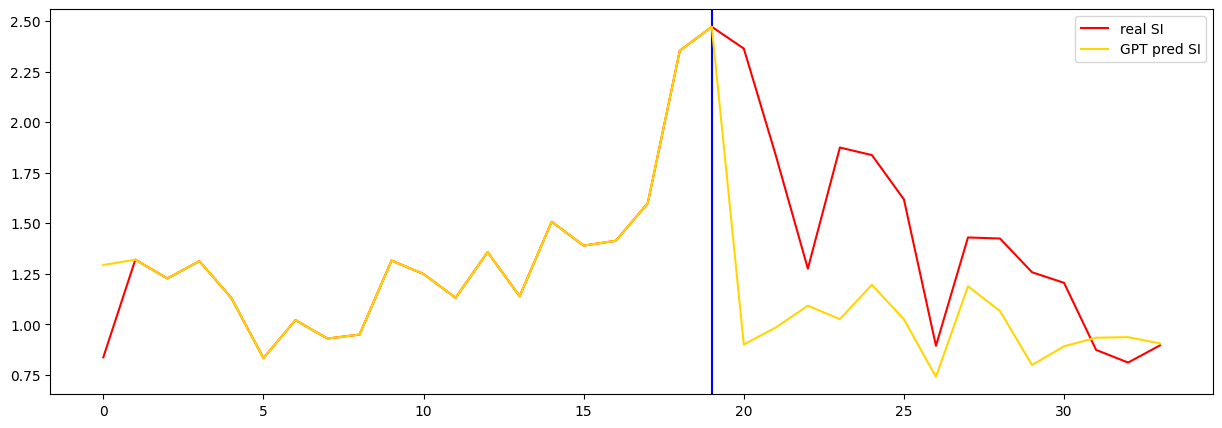

In [10]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  23.841079711914062
seq length of pred =  30
[ 4.93569924  2.05127937 12.75094929 23.84106769  0.57520275  0.42004968]
[tensor(1.1504, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0437, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  23.08320426940918
seq length of pred =  30
[ 4.76319496  2.1102543  12.1303868  23.08319196  0.56233801  0.40742212]
[tensor(1.1247, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0215, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  23.57786750793457
seq length of pred =  30
[ 4.88206932  2.02037345 12.1851519  23.57785662  0.57542517  0.41675528]
[tensor(1.1509, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9604, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  23.44379234313965
seq length of pred =  30
[ 4.85923943  2.1281042  12.31837896 23.44378124  0.5756946   0.41246812]
[tensor(1.1514, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9933, device='cuda:0'

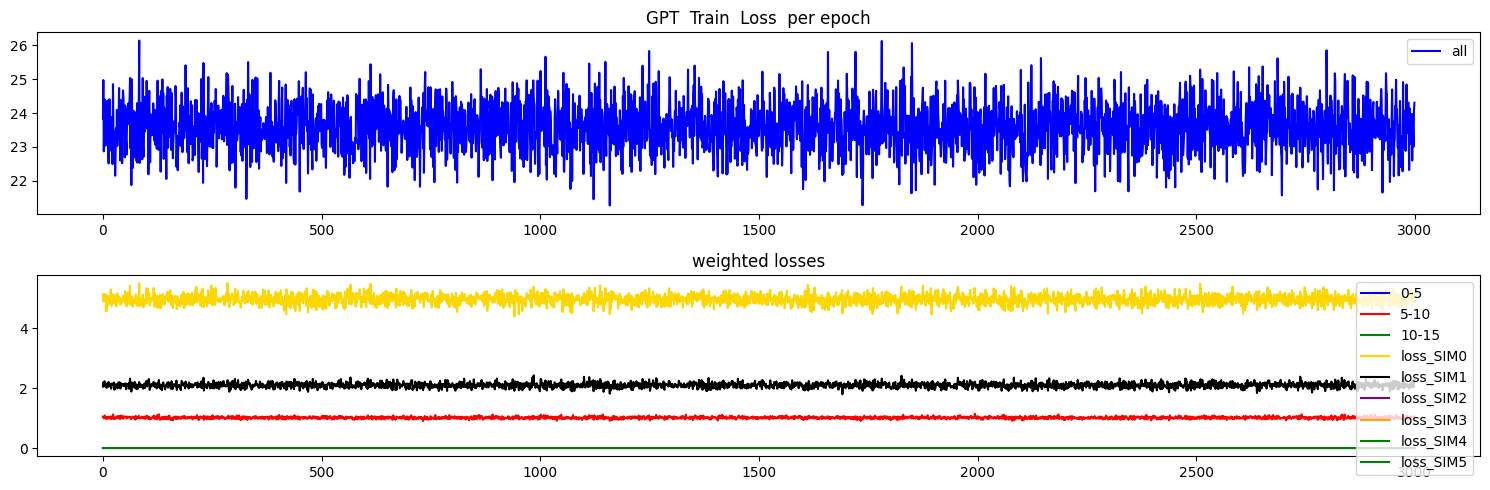

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.15337425470352173
Test MSE Loss - SI only 0-5:  0.0917598083615303
Test MSE Loss - SI only 5-10:  0.17001523077487946
Test MSE Loss - SI only 10-15:  0.20219692587852478
mae, mse, rmse, mape, mspe, rse, corr
(0.32616422, 0.15337427, 0.39163026, 2.3480346, 9.372452, 1.2817776)
Testing R**2 - SI only:  -0.6429541340601184
Testing R**2 - SI only:  -0.6429541340601184
Testing R**2 - All features:  0.9607480819028418
Testing R**2 - (f2) - SI full:  -0.9117279734833272


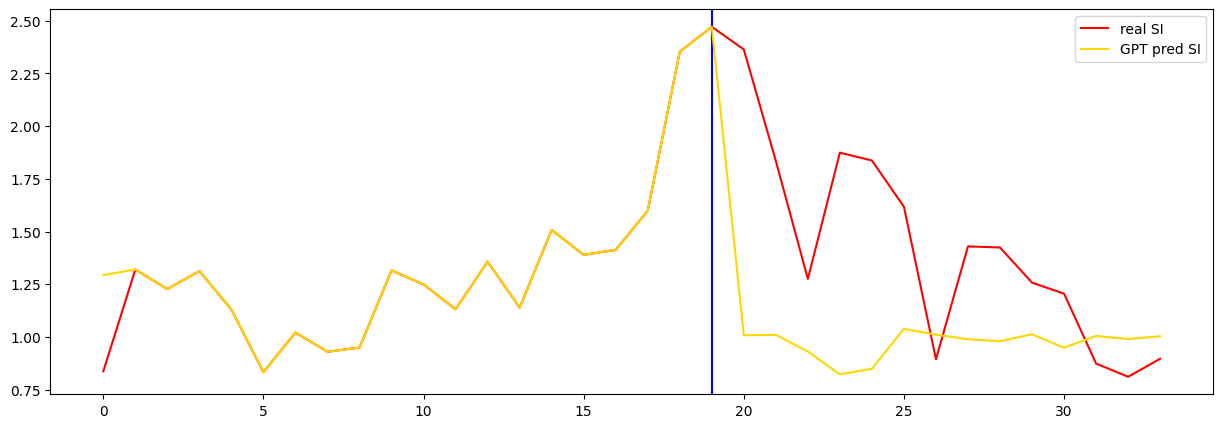

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  19.858104705810547
seq length of pred =  30
[ 5.59048425  2.17937874 10.86284024 19.85809501  0.43517045  0.34361924]
[tensor(0.8703, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0393, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  20.362215042114258
seq length of pred =  30
[ 5.28924631  2.14971907 11.28342009 20.36220522  0.4410725   0.35232293]
[tensor(0.8821, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1007, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  19.771120071411133
seq length of pred =  30
[ 5.04204334  2.08221329 10.99670299 19.7711112   0.43006902  0.34234587]
[tensor(0.8601, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0903, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  21.7093505859375
seq length of pred =  30
[ 5.76611239  2.45202904 12.35658162 21.70933826  0.53244086  0.37690462]
[tensor(1.0649, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1394, device='cuda:0

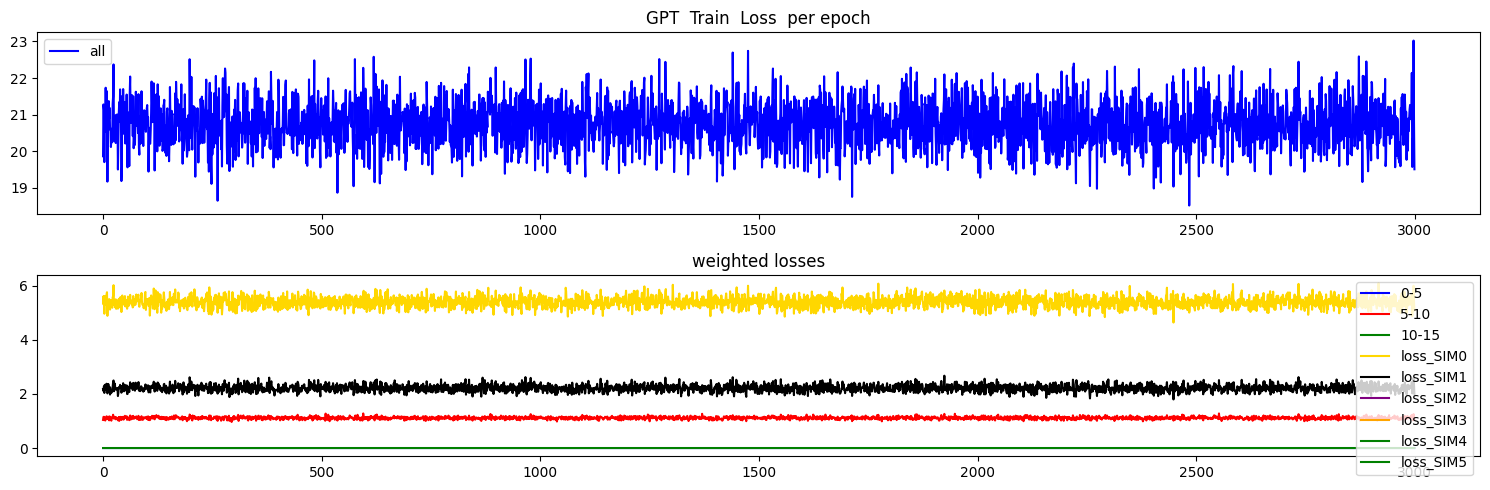

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.1302509903907776
Test MSE Loss - SI only 0-5:  0.09175980091094971
Test MSE Loss - SI only 5-10:  0.17001524567604065
Test MSE Loss - SI only 10-15:  0.20219692587852478
mae, mse, rmse, mape, mspe, rse, corr
(0.29820707, 0.13025099, 0.36090302, 2.1793532, 8.869189, 1.1812096)
Testing R**2 - SI only:  -0.3952562637896244
Testing R**2 - SI only:  -0.3952562637896244
Testing R**2 - All features:  0.9590536739400616
Testing R**2 - (f2) - SI full:  -0.8314041540623935


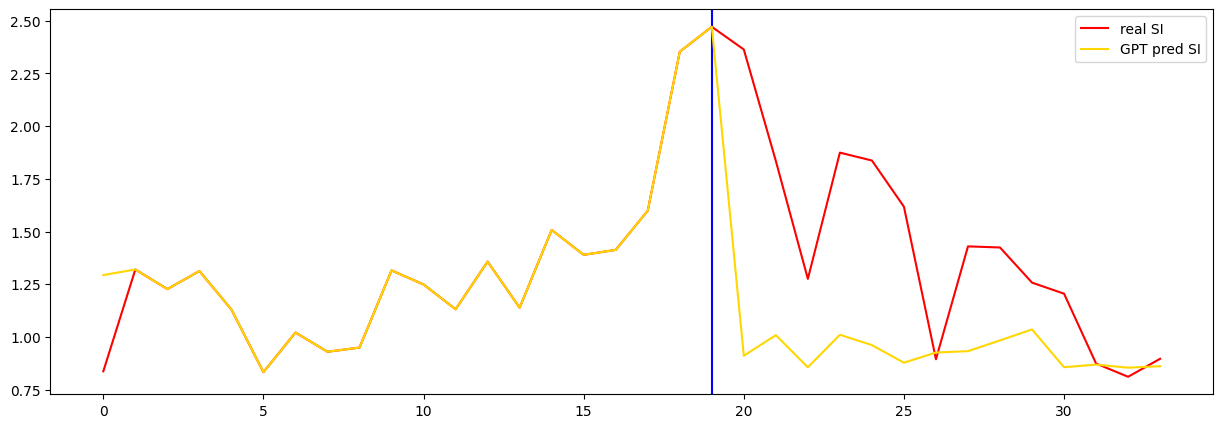

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  23.09406089782715
seq length of pred =  30
[ 4.99293269  2.33293398 13.72480617 23.09404963  0.58216756  0.40365369]
[tensor(1.1643, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1789, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  22.983470916748047
seq length of pred =  30
[ 4.76883073  2.33828986 13.62000644 22.98345864  0.56932424  0.3990409 ]
[tensor(1.1386, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1655, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  23.22012710571289
seq length of pred =  30
[ 4.71295102  2.21454846 13.36005353 23.22011492  0.57683002  0.40821439]
[tensor(1.1537, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0470, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  21.73113250732422
seq length of pred =  30
[ 4.56462717  2.14247221 12.75854324 21.7311231   0.5014956   0.37814057]
[tensor(1.0030, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0615, device='cuda:0'

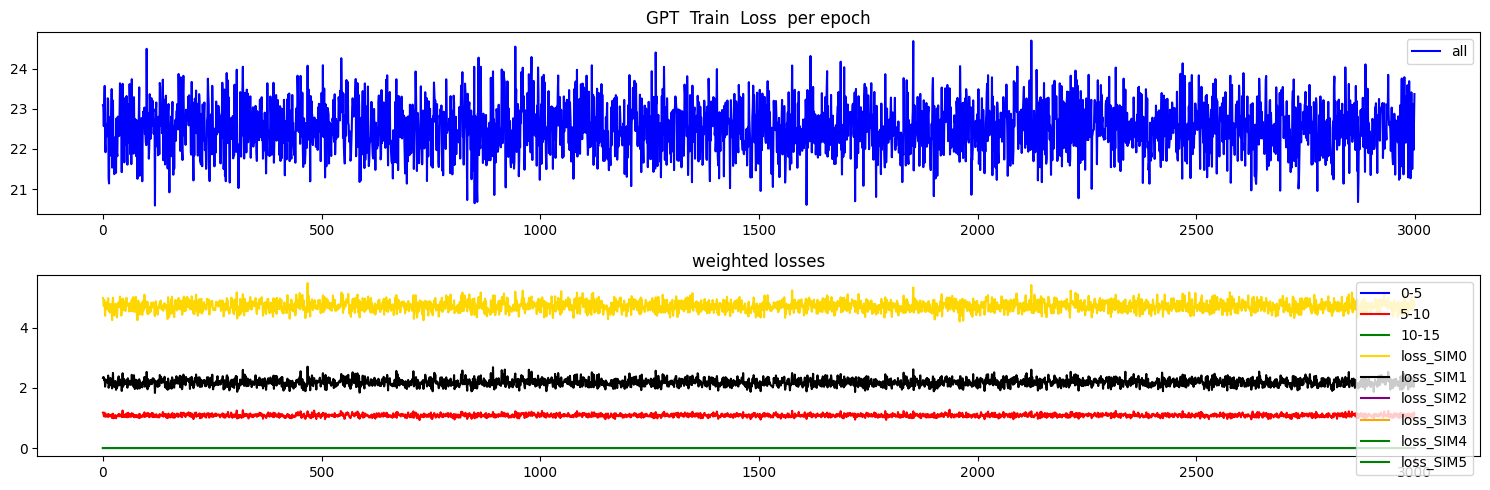

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.13392794132232666
Test MSE Loss - SI only 0-5:  0.09175979346036911
Test MSE Loss - SI only 5-10:  0.17001524567604065
Test MSE Loss - SI only 10-15:  0.20219692587852478
mae, mse, rmse, mape, mspe, rse, corr
(0.29671648, 0.13392794, 0.36596167, 2.2084055, 9.255188, 1.1977663)
Testing R**2 - SI only:  -0.43464386697183977
Testing R**2 - SI only:  -0.43464386697183977
Testing R**2 - All features:  0.9558735318652489
Testing R**2 - (f2) - SI full:  -0.8691539815338685


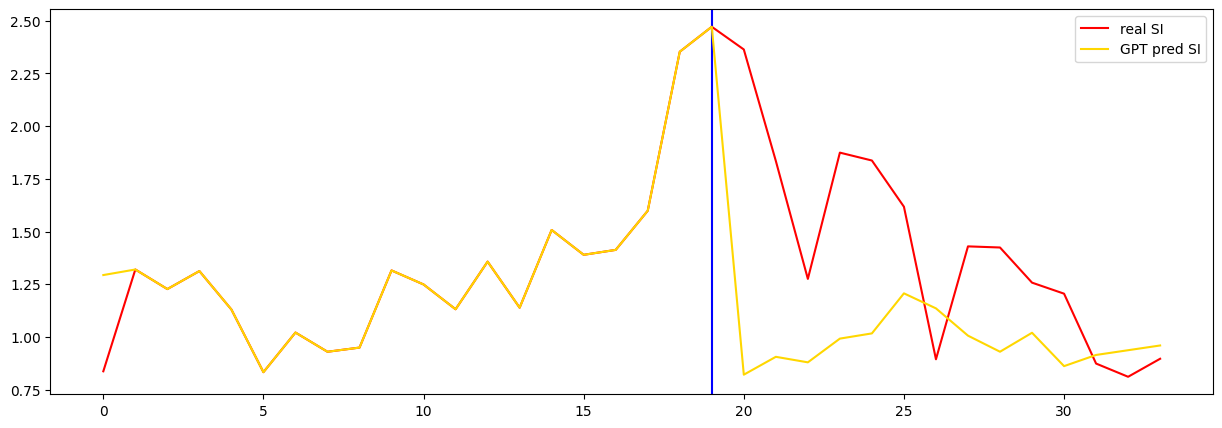

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [14]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  28.054594039916992
seq length of pred =  30
[ 4.39545429  2.59154142 15.27660509 28.05457732  0.87056035  0.50778004]
[tensor(1.7411, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4764, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  29.064556121826172
seq length of pred =  30
[ 4.46126567  2.64412361 15.75809476 29.06453696  0.9313574   0.53130583]
[tensor(1.8627, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5779, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  28.797487258911133
seq length of pred =  30
[ 4.50263168  2.39882994 14.66189094 28.79746729  0.91878213  0.53354711]
[tensor(1.8376, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4563, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  28.59465789794922
seq length of pred =  30
[ 4.41802594  2.50859772 15.46933585 28.59464108  0.89863644  0.5240758 ]
[tensor(1.7973, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5112, device='cuda:

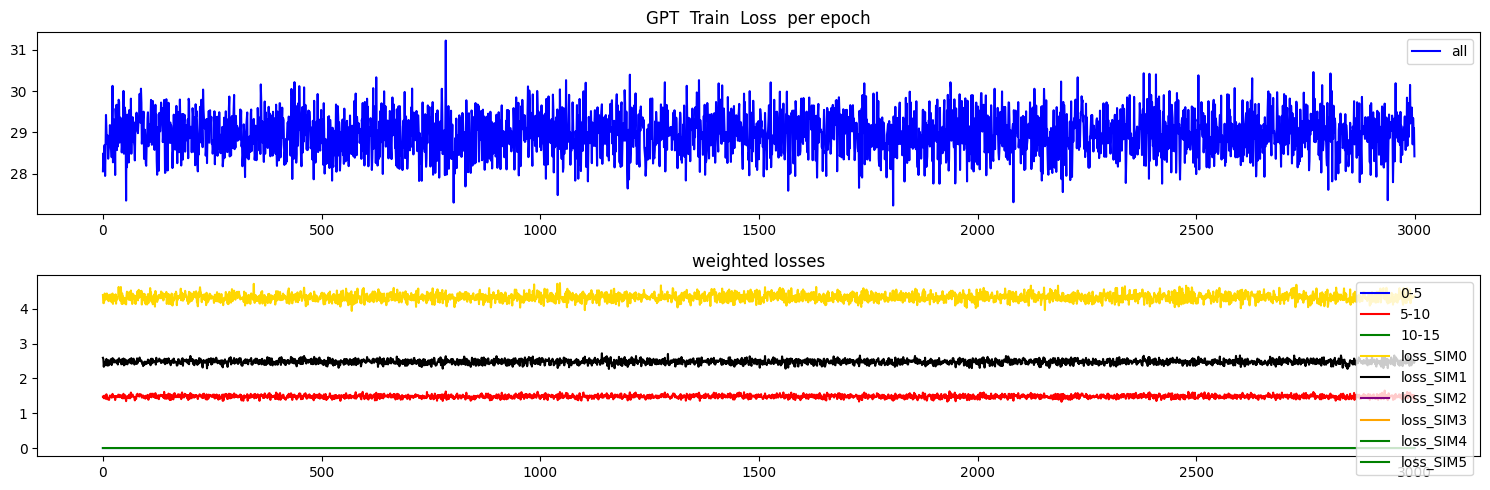

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0851958841085434
Test MSE Loss - SI only 0-5:  0.06912770122289658
Test MSE Loss - SI only 5-10:  0.10600662231445312
Test MSE Loss - SI only 10-15:  0.03583721071481705
mae, mse, rmse, mape, mspe, rse, corr
(0.23178947, 0.08519588, 0.29188332, 6.634521, 396.48355, 1.326248)
Testing R**2 - SI only:  -0.7589335244599686
Testing R**2 - SI only:  -0.7589335244599686
Testing R**2 - All features:  0.9845320259371849
Testing R**2 - (f2) - SI full:  -0.1896099855368789


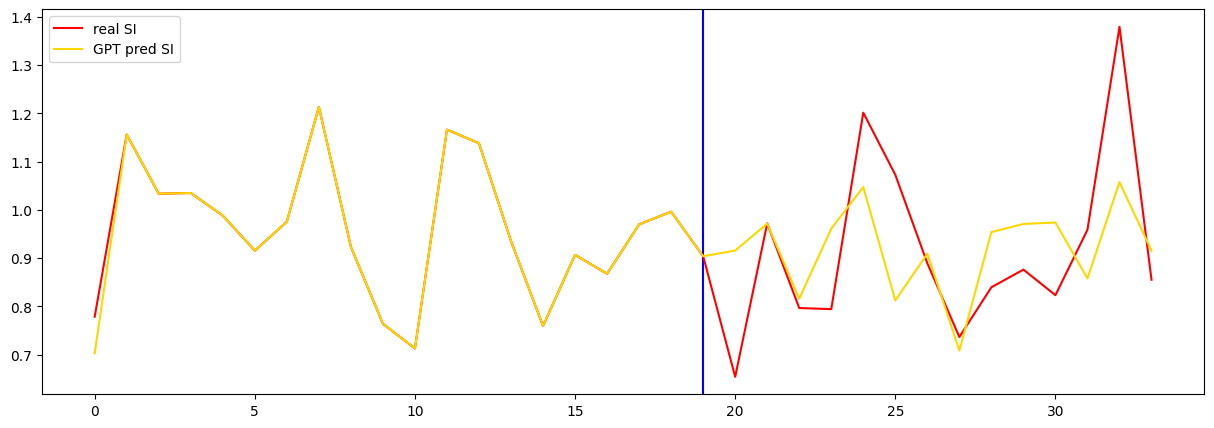

In [15]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  25.494701385498047
seq length of pred =  30
[ 4.89395775  2.15022526 13.45797925 25.49468715  0.64728109  0.45331967]
[tensor(1.2946, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4270, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  25.098623275756836
seq length of pred =  30
[ 4.60675496  2.10559232 13.17043312 25.0986094   0.66816636  0.451676  ]
[tensor(1.3363, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3925, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  25.905202865600586
seq length of pred =  30
[ 4.93295139  2.08360706 13.25941559 25.90518933  0.68686992  0.46488759]
[tensor(1.3737, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4093, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  25.364883422851562
seq length of pred =  30
[ 4.82696293  2.16038615 13.5386875  25.36486918  0.6477479   0.45058697]
[tensor(1.2955, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3858, device='cuda

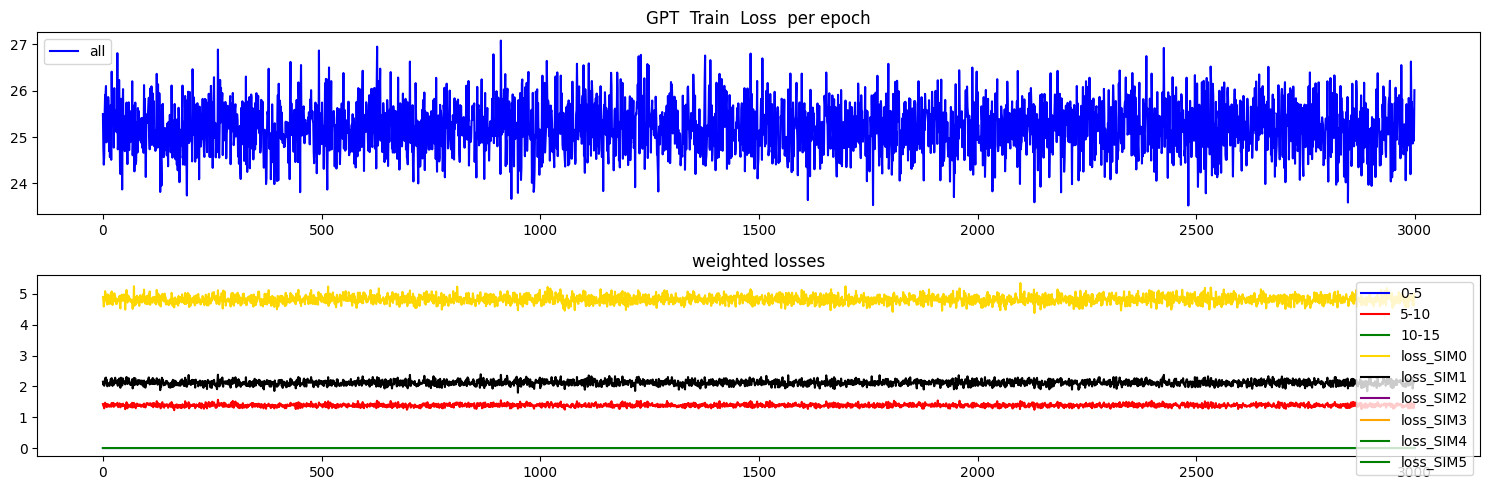

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0850631520152092
Test MSE Loss - SI only 0-5:  0.06912770122289658
Test MSE Loss - SI only 5-10:  0.10600662231445312
Test MSE Loss - SI only 10-15:  0.03583721071481705
mae, mse, rmse, mape, mspe, rse, corr
(0.22578813, 0.085063145, 0.29165587, 4.520054, 218.17883, 1.3252143)
Testing R**2 - SI only:  -0.7561932480189317
Testing R**2 - SI only:  -0.7561932480189317
Testing R**2 - All features:  0.987246230728932
Testing R**2 - (f2) - SI full:  -0.402944411816448


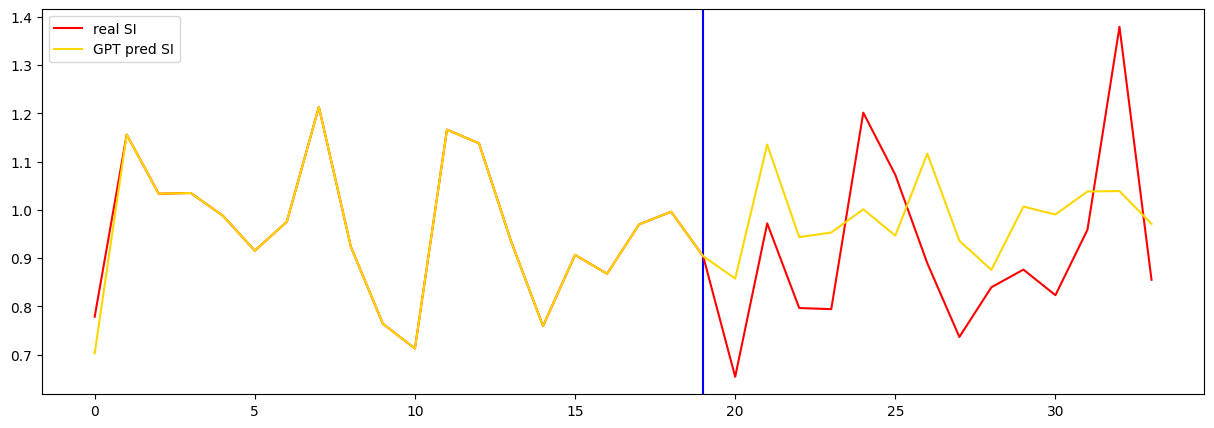

In [16]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  26.418071746826172
seq length of pred =  30
[ 4.53442925  2.25960147 15.8737772  26.41805686  0.74533628  0.47123519]
[tensor(1.4907, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3109, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  26.403764724731445
seq length of pred =  30
[ 4.41481252  2.21405512 15.46775874 26.40374983  0.72242444  0.46821491]
[tensor(1.4448, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2705, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  26.259117126464844
seq length of pred =  30
[ 4.47513182  2.13593937 15.00535579 26.25910337  0.6909725   0.46464482]
[tensor(1.3819, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3116, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  27.276016235351562
seq length of pred =  30
[ 4.66802424  2.28688941 15.51071585 27.27600165  0.7738458   0.4852788 ]
[tensor(1.5477, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3047, device='cuda

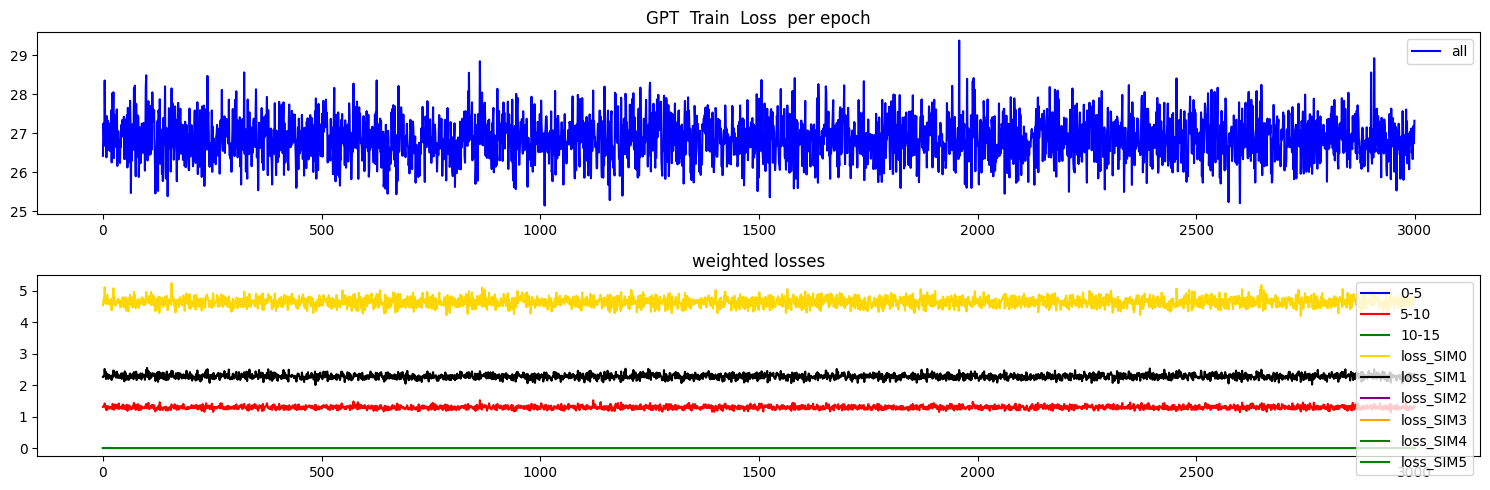

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0862131118774414
Test MSE Loss - SI only 0-5:  0.06912770122289658
Test MSE Loss - SI only 5-10:  0.10600662231445312
Test MSE Loss - SI only 10-15:  0.03583721071481705
mae, mse, rmse, mape, mspe, rse, corr
(0.22626214, 0.08621311, 0.2936207, 5.2259254, 250.1238, 1.334142)
Testing R**2 - SI only:  -0.7799351446817859
Testing R**2 - SI only:  -0.7799351446817859
Testing R**2 - All features:  0.9804006726167658
Testing R**2 - (f2) - SI full:  -0.22944096001961967


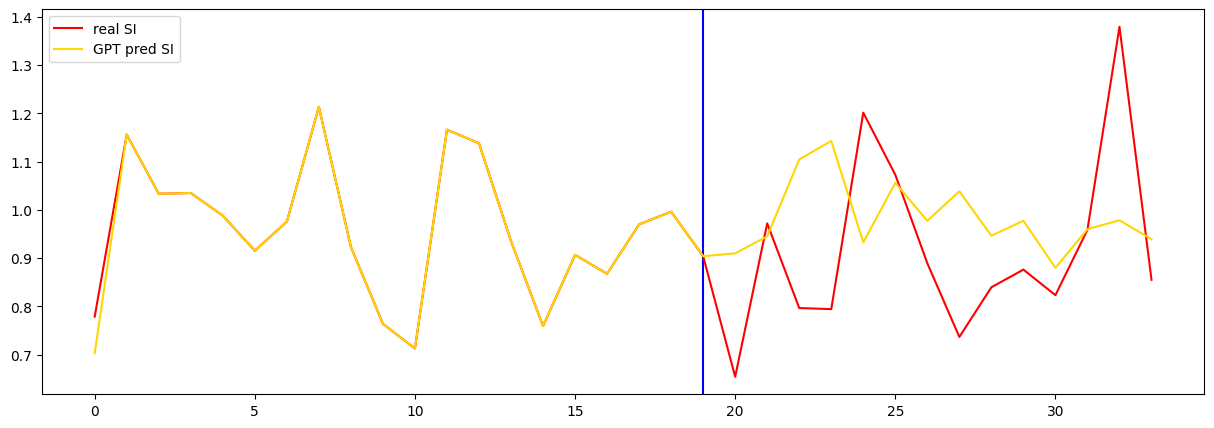

In [17]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  27.142011642456055
seq length of pred =  30
[ 4.25224841  2.15413874 14.65963281 27.14199548  0.72010421  0.48244715]
[tensor(1.4402, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2454, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  28.03074836730957
seq length of pred =  30
[ 4.43036285  2.21639916 15.36916913 28.03073375  0.79772341  0.50492777]
[tensor(1.5954, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2314, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  28.15420150756836
seq length of pred =  30
[ 4.67565504  2.21013881 14.96654148 28.15418707  0.77011263  0.50437501]
[tensor(1.5402, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2232, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  27.760169982910156
seq length of pred =  30
[ 4.47332268  2.22524143 15.53256673 27.76015462  0.80148068  0.50154508]
[tensor(1.6030, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2475, device='cuda:0

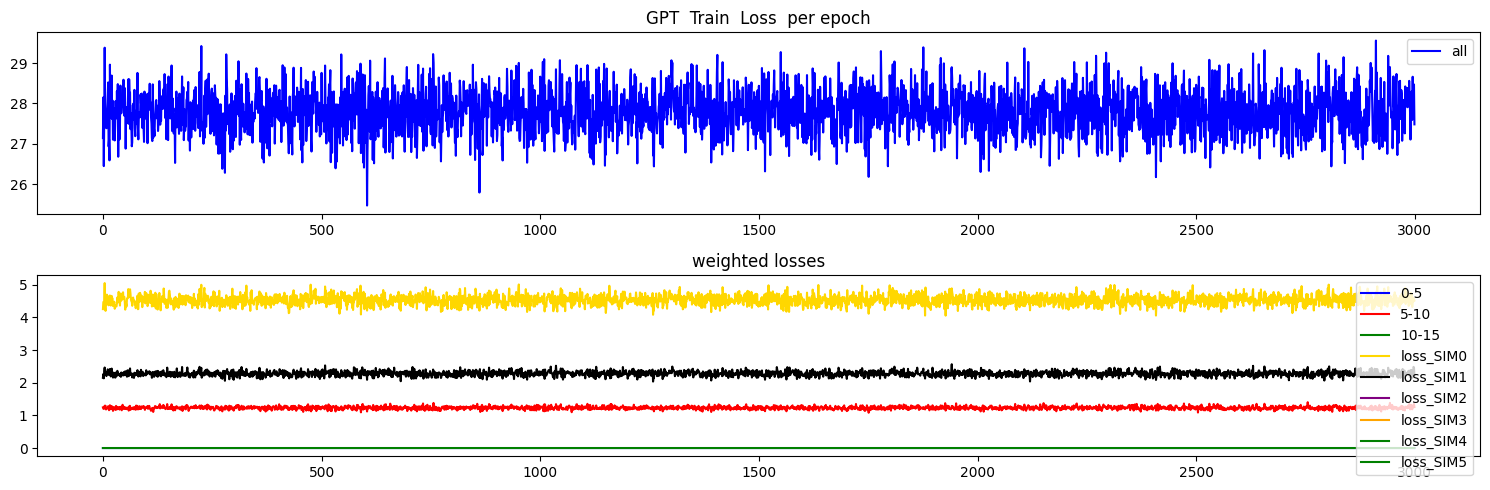

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.08617004752159119
Test MSE Loss - SI only 0-5:  0.06912770122289658
Test MSE Loss - SI only 5-10:  0.10600660741329193
Test MSE Loss - SI only 10-15:  0.03583721071481705
mae, mse, rmse, mape, mspe, rse, corr
(0.22747688, 0.08617004, 0.29354733, 5.4436927, 260.09244, 1.3338088)
Testing R**2 - SI only:  -0.7790459309124704
Testing R**2 - SI only:  -0.7790459309124704
Testing R**2 - All features:  0.979818142621303
Testing R**2 - (f2) - SI full:  -0.26856758624321064


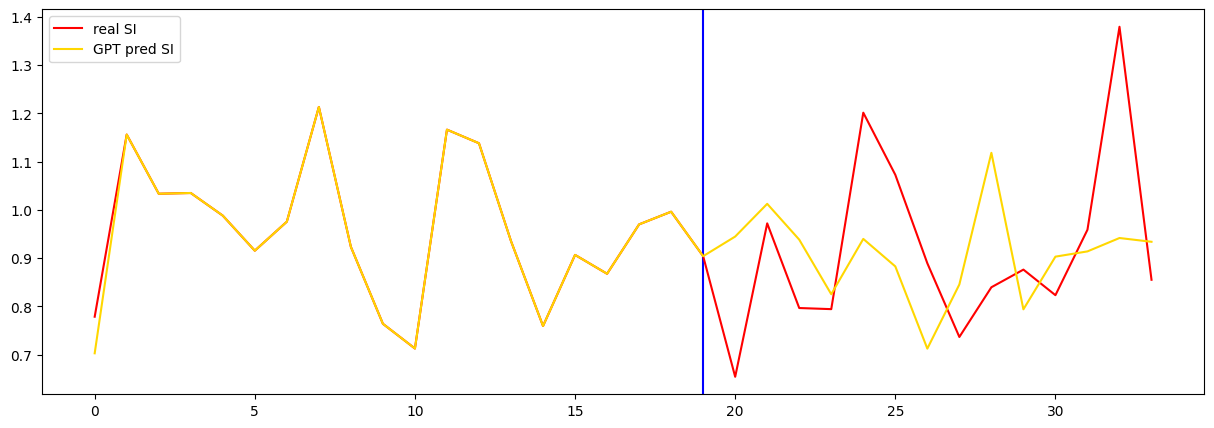

In [18]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [19]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  32.485801696777344
seq length of pred =  30
[ 5.28279484  2.58611663 18.10616289 32.48577937  1.13067629  0.59754335]
[tensor(2.2614, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5052, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  32.18569564819336
seq length of pred =  30
[ 5.03496242  2.59888172 17.9379559  32.18567222  1.11959029  0.59387272]
[tensor(2.2392, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4942, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  33.329322814941406
seq length of pred =  30
[ 5.17916547  2.64841757 18.64911501 33.32930038  1.22277886  0.62385737]
[tensor(2.4456, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5664, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  31.724275588989258
seq length of pred =  30
[ 5.02193001  2.57906982 17.34826681 31.72425247  1.10351359  0.59240847]
[tensor(2.2070, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4998, device='cuda:

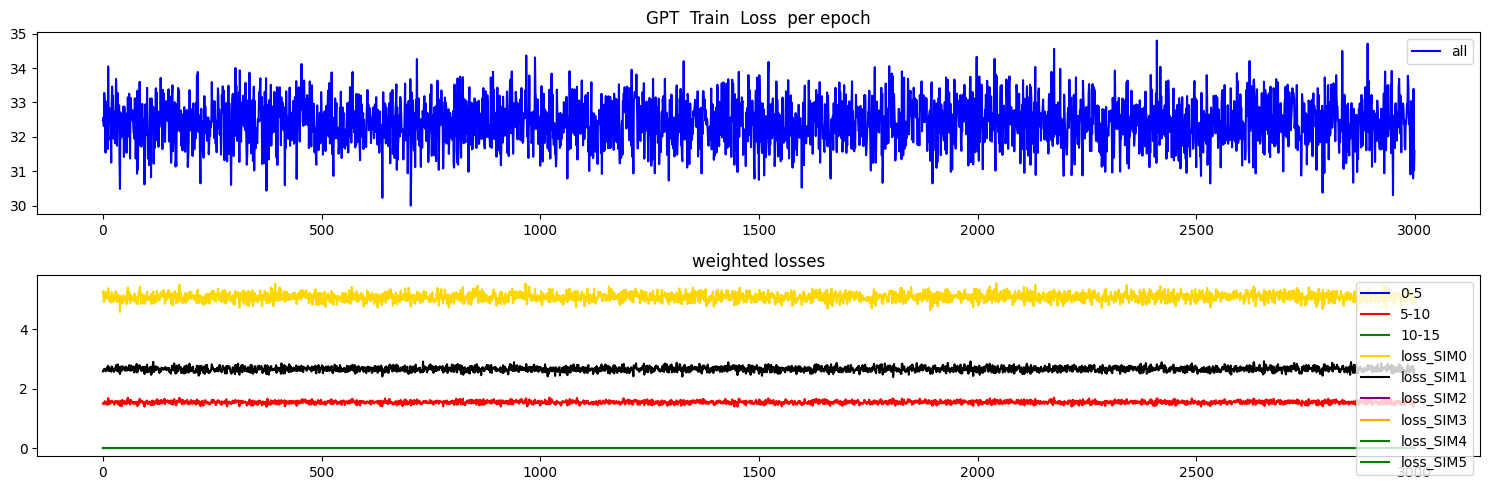

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.045321136713027954
Test MSE Loss - SI only 0-5:  0.014732363633811474
Test MSE Loss - SI only 5-10:  0.009920848533511162
Test MSE Loss - SI only 10-15:  0.0694141760468483
mae, mse, rmse, mape, mspe, rse, corr
(0.17332442, 0.045321137, 0.21288761, 83.58797, 223934.22, 1.2445182)
Testing R**2 - SI only:  -0.5488256573641224
Testing R**2 - SI only:  -0.5488256573641224
Testing R**2 - All features:  0.9926466410778484
Testing R**2 - (f2) - SI full:  -0.8713493115461957


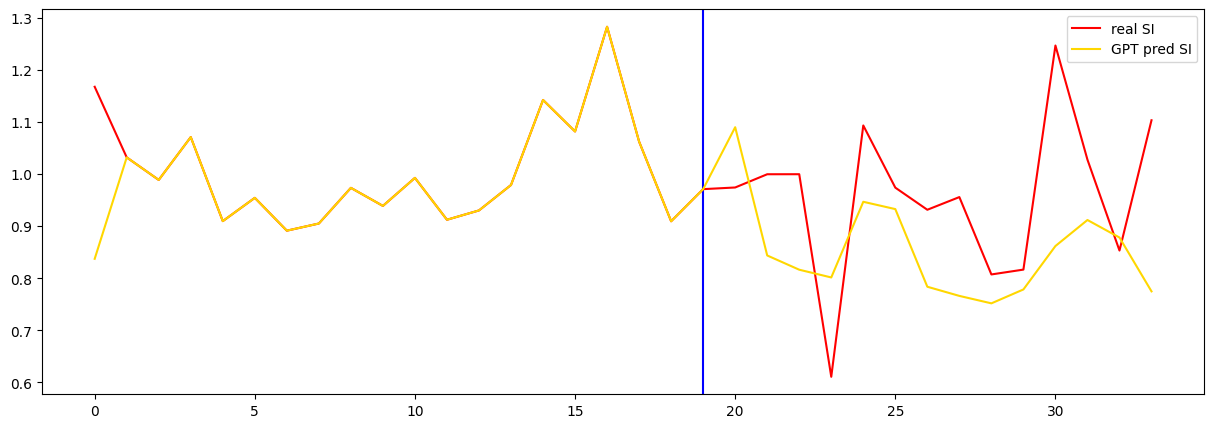

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  26.76770782470703
seq length of pred =  30
[ 4.12201675  2.12550377 13.87543112 26.76769322  0.72992182  0.48253218]
[tensor(1.4598, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2438, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  27.144271850585938
seq length of pred =  30
[ 4.20986427  2.06975244 13.89250966 27.14425616  0.75706112  0.49405242]
[tensor(1.5141, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2017, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  25.829145431518555
seq length of pred =  30
[ 4.00217574  2.01021554 12.80944857 25.82913286  0.67104498  0.46571339]
[tensor(1.3421, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1474, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  26.359670639038086
seq length of pred =  30
[ 3.9081684   1.99200434 12.95959684 26.35965786  0.67966271  0.47239056]
[tensor(1.3593, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1663, device='cuda:

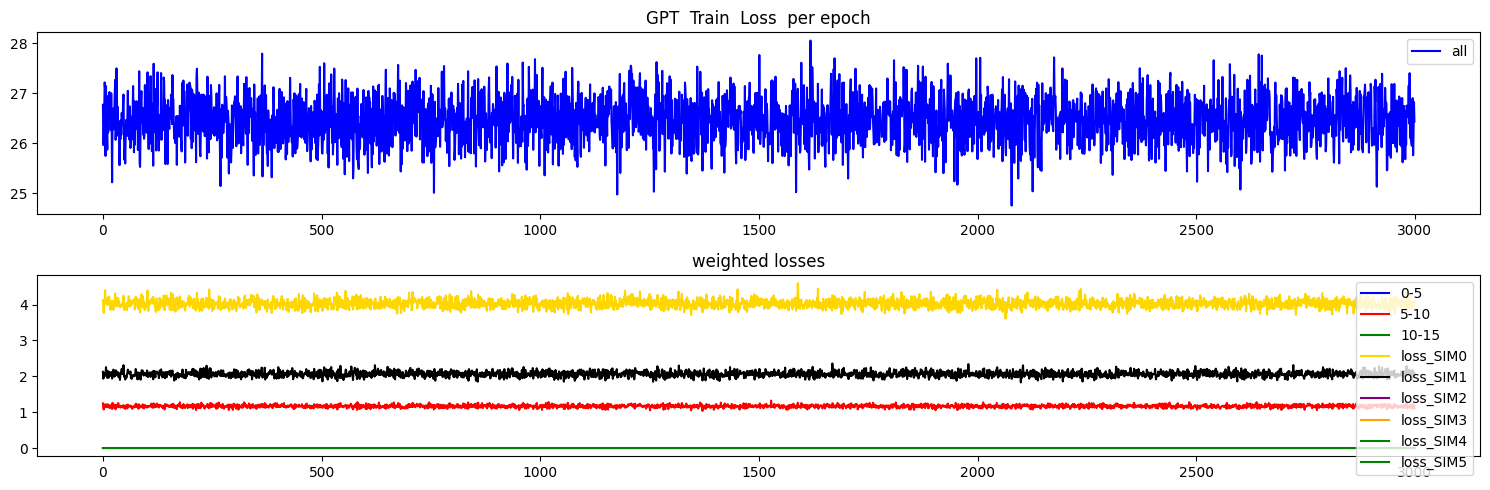

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04310179501771927
Test MSE Loss - SI only 0-5:  0.014732363633811474
Test MSE Loss - SI only 5-10:  0.009920848533511162
Test MSE Loss - SI only 10-15:  0.0694141760468483
mae, mse, rmse, mape, mspe, rse, corr
(0.16461004, 0.04310179, 0.20760971, 43.423447, 56681.8, 1.2136642)
Testing R**2 - SI only:  -0.47298070159068994
Testing R**2 - SI only:  -0.47298070159068994
Testing R**2 - All features:  0.9839416951095663
Testing R**2 - (f2) - SI full:  -0.9861528575121628


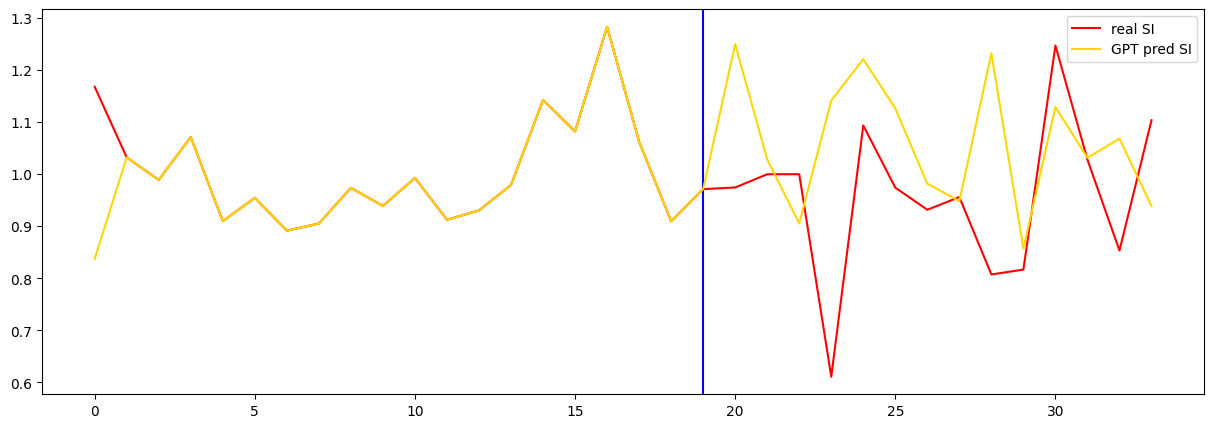

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  25.071889877319336
seq length of pred =  30
[ 3.65563092  2.22971024 15.83068018 25.0718771   0.67599472  0.44340403]
[tensor(1.3520, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1913, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  26.163423538208008
seq length of pred =  30
[ 4.08049897  2.62631563 15.73956443 26.16340896  0.76082524  0.46276079]
[tensor(1.5217, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2834, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  27.311431884765625
seq length of pred =  30
[ 4.08391573  2.7477827  16.81549835 27.3114155   0.83014787  0.48455984]
[tensor(1.6603, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2809, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  26.027782440185547
seq length of pred =  30
[ 4.02249339  2.58897827 16.15021974 26.02776721  0.73820973  0.45693091]
[tensor(1.4764, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2633, device='cuda

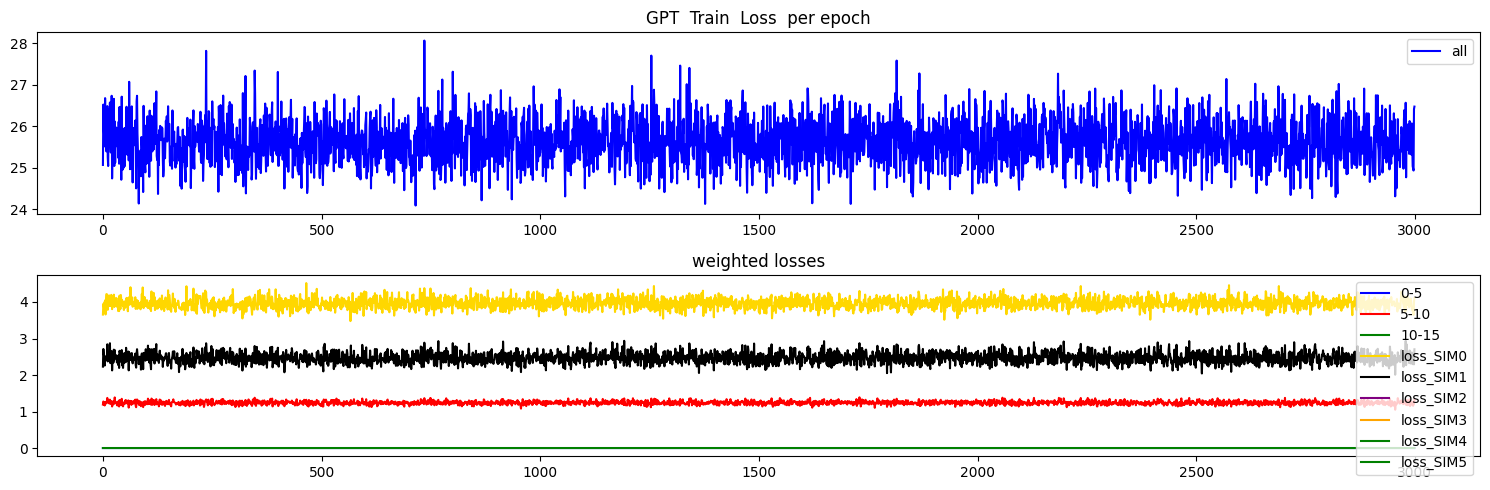

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05664537101984024
Test MSE Loss - SI only 0-5:  0.014732363633811474
Test MSE Loss - SI only 5-10:  0.009920848533511162
Test MSE Loss - SI only 10-15:  0.0694141760468483
mae, mse, rmse, mape, mspe, rse, corr
(0.18267855, 0.056645367, 0.23800287, 30.135965, 25051.225, 1.3913393)
Testing R**2 - SI only:  -0.9358251564756006
Testing R**2 - SI only:  -0.9358251564756006
Testing R**2 - All features:  0.994081832287736
Testing R**2 - (f2) - SI full:  -1.2455875801289298


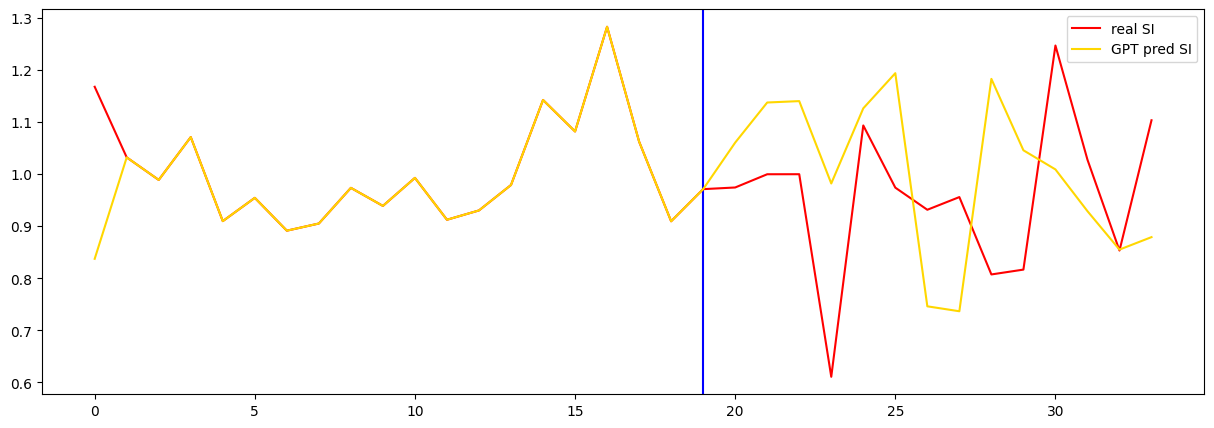

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  24.66482162475586
seq length of pred =  30
[ 3.92339387  2.01579293 13.62283964 24.66480785  0.62875942  0.43730803]
[tensor(1.2575, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0621, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  26.155237197875977
seq length of pred =  30
[ 3.92088106  2.18550465 14.87820862 26.15522396  0.71407885  0.46813158]
[tensor(1.4282, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0780, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  25.66118812561035
seq length of pred =  30
[ 3.89615298  2.4965134  14.48044315 25.66117206  0.72797396  0.45881191]
[tensor(1.4559, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1403, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  24.330162048339844
seq length of pred =  30
[ 3.85786558  2.07447853 13.33447892 24.33015102  0.60614747  0.43100455]
[tensor(1.2123, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0427, device='cuda:0

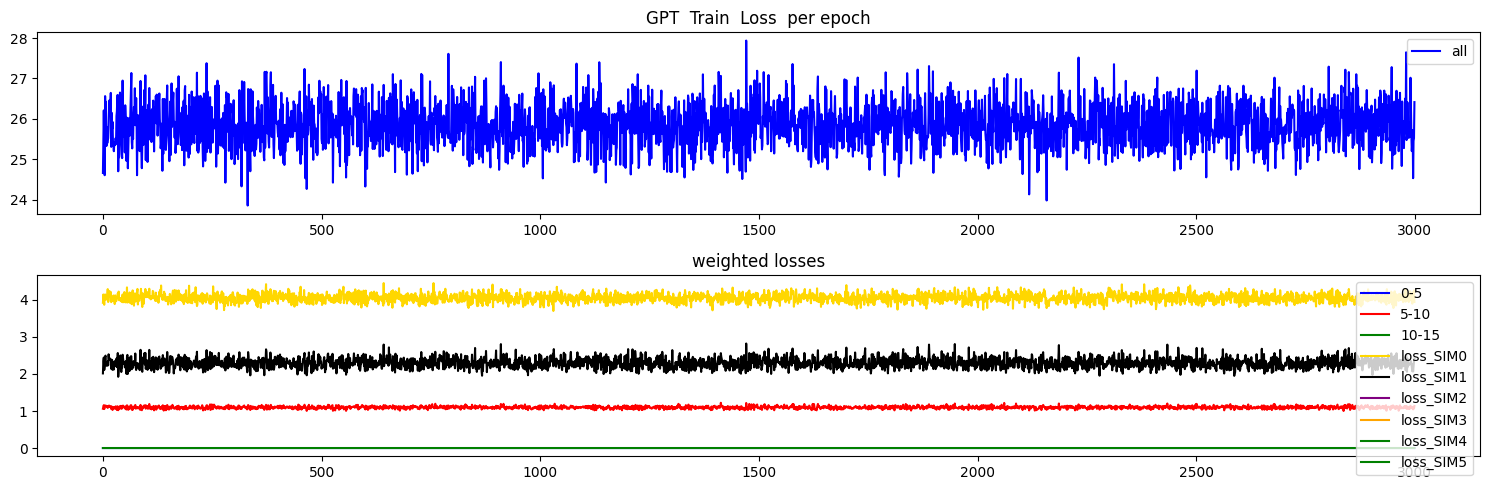

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03347499296069145
Test MSE Loss - SI only 0-5:  0.014732363633811474
Test MSE Loss - SI only 5-10:  0.009920848533511162
Test MSE Loss - SI only 10-15:  0.0694141834974289
mae, mse, rmse, mape, mspe, rse, corr
(0.1518071, 0.03347499, 0.18296172, 19.030735, 9250.647, 1.0695747)
Testing R**2 - SI only:  -0.14398986244182965
Testing R**2 - SI only:  -0.14398986244182965
Testing R**2 - All features:  0.9890012016179891
Testing R**2 - (f2) - SI full:  -1.5524068744563513


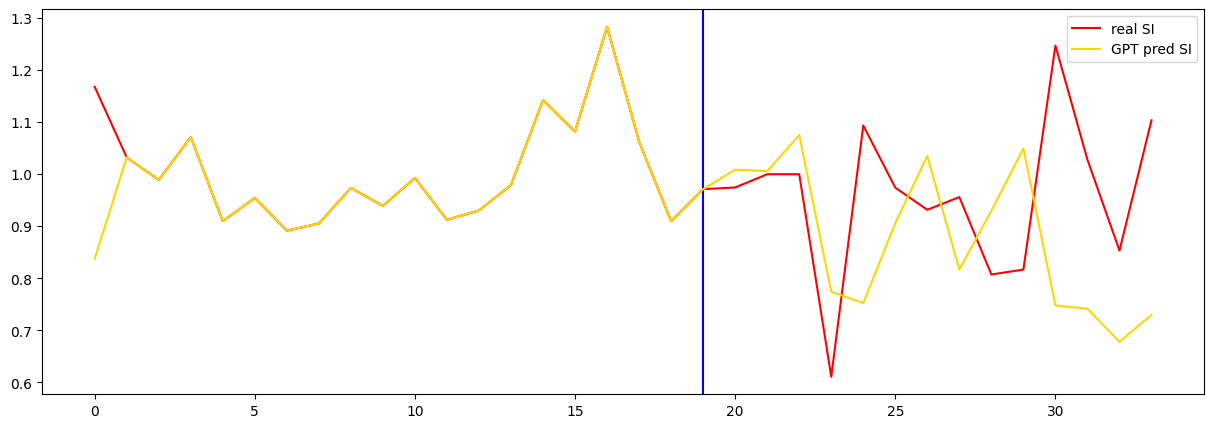

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  23.948657989501953
seq length of pred =  30
[ 5.62347487  2.60216206 13.92693275 23.94864261  0.7188575   0.41564056]
[tensor(1.4377, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4168, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  22.96902847290039
seq length of pred =  30
[ 5.25270424  2.48958914 13.36733701 22.96901582  0.63991511  0.39809942]
[tensor(1.2798, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3580, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  21.446847915649414
seq length of pred =  30
[ 4.60518404  2.05683274 12.67138878 21.44683922  0.50545588  0.37114663]
[tensor(1.0109, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2007, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  23.648881912231445
seq length of pred =  30
[ 5.29900915  2.56893614 14.02701538 23.64886885  0.69232817  0.41004726]
[tensor(1.3847, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3951, device='cuda:

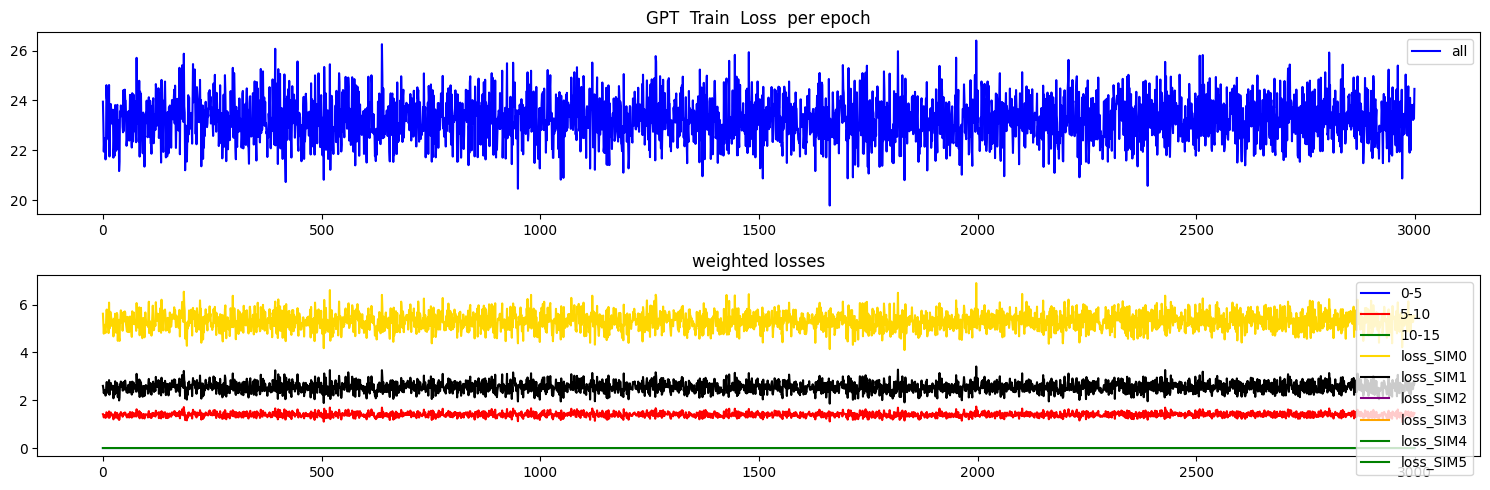

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06992550194263458
Test MSE Loss - SI only 0-5:  0.05730586498975754
Test MSE Loss - SI only 5-10:  0.1757495403289795
Test MSE Loss - SI only 10-15:  0.036175571382045746
mae, mse, rmse, mape, mspe, rse, corr
(0.22331499, 0.06992551, 0.2644343, 3.1899555, 26.932768, 1.4624624)
Testing R**2 - SI only:  -1.1387962278047348
Testing R**2 - SI only:  -1.1387962278047348
Testing R**2 - All features:  0.9849906430948994
Testing R**2 - (f2) - SI full:  -0.5463061664647049


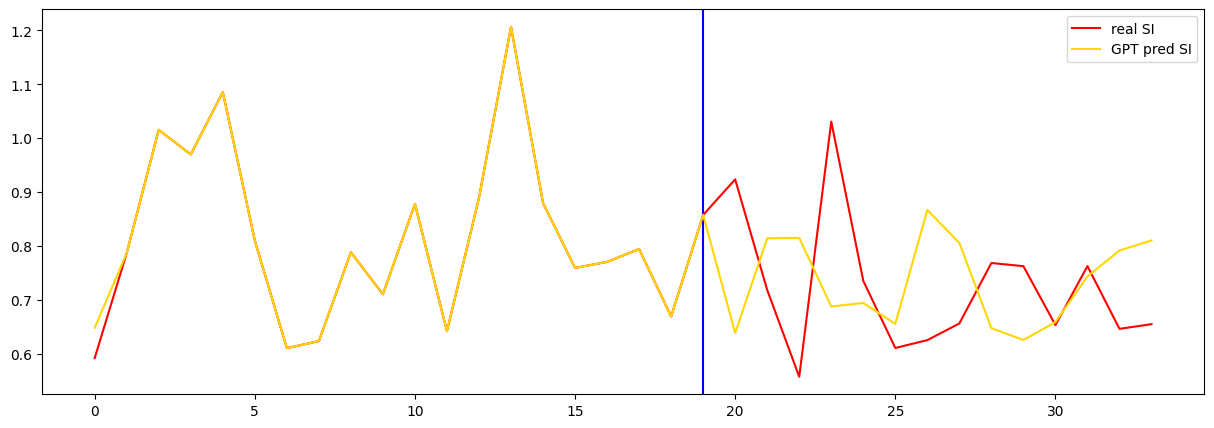

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  21.961719512939453
seq length of pred =  30
[ 4.52034931  2.03055335 11.64120597 21.96171092  0.50655742  0.38185595]
[tensor(1.0131, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3228, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  21.440397262573242
seq length of pred =  30
[ 4.39715116  2.0369424  11.59844629 21.44038759  0.49141127  0.37436567]
[tensor(0.9828, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3025, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  20.267202377319336
seq length of pred =  30
[ 3.95436997  1.92230261 10.93891164 20.2671924   0.43537577  0.35232589]
[tensor(0.8708, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2585, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  21.050029754638672
seq length of pred =  30
[ 4.1710345   1.96521811 11.20602072 21.05002053  0.48261475  0.36846191]
[tensor(0.9652, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2922, device='cuda

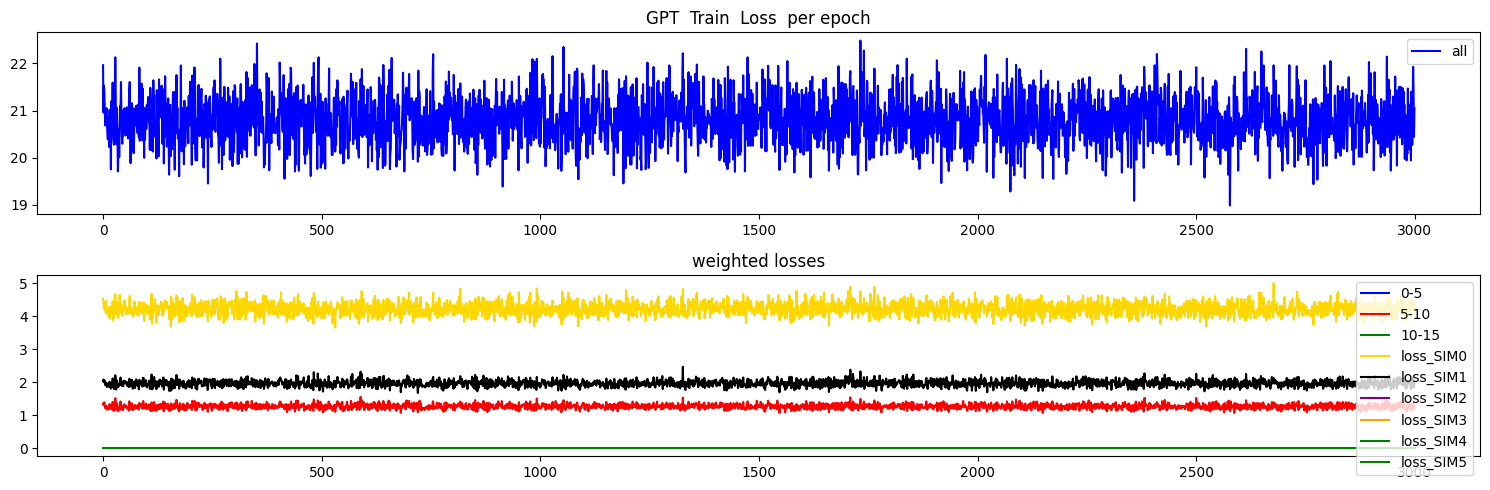

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06741807609796524
Test MSE Loss - SI only 0-5:  0.05730586498975754
Test MSE Loss - SI only 5-10:  0.1757495403289795
Test MSE Loss - SI only 10-15:  0.036175571382045746
mae, mse, rmse, mape, mspe, rse, corr
(0.20803346, 0.067418076, 0.2596499, 2.7842484, 21.175432, 1.436002)
Testing R**2 - SI only:  -1.062102002314243
Testing R**2 - SI only:  -1.062102002314243
Testing R**2 - All features:  0.9821361010169196
Testing R**2 - (f2) - SI full:  -6.539134624214076


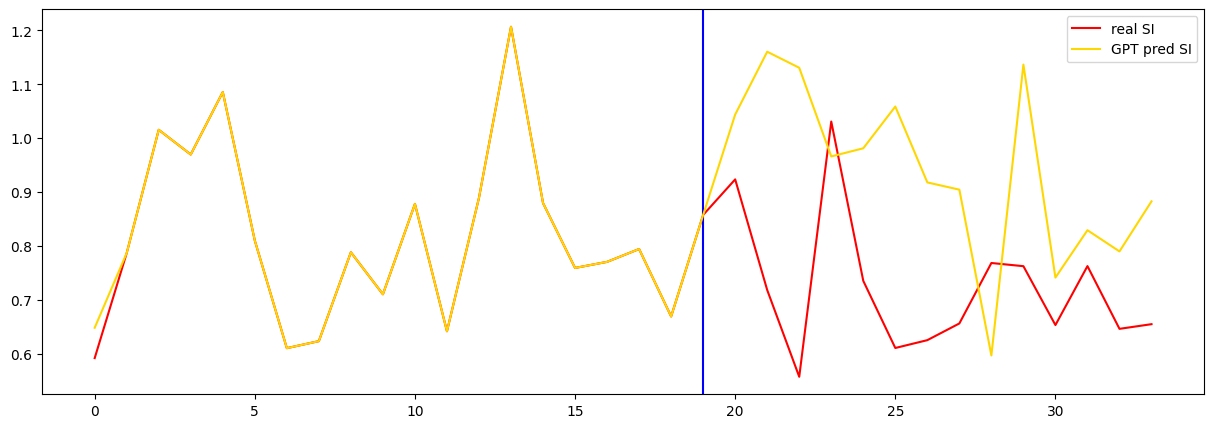

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  22.285762786865234
seq length of pred =  30
[ 3.48025     2.19859025 13.82161703 22.28575108  0.54239436  0.38806943]
[tensor(1.0848, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2255, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  21.412141799926758
seq length of pred =  30
[ 3.39748771  2.08021134 13.08522913 21.41213229  0.49144652  0.37175805]
[tensor(0.9829, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2222, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  21.90934944152832
seq length of pred =  30
[ 3.33659632  2.16602552 13.39849987 21.90934073  0.52127722  0.38192206]
[tensor(1.0426, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2746, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  22.908620834350586
seq length of pred =  30
[ 3.32149875  2.20453505 14.11612586 22.90860991  0.55021977  0.39825266]
[tensor(1.1004, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1882, device='cuda:

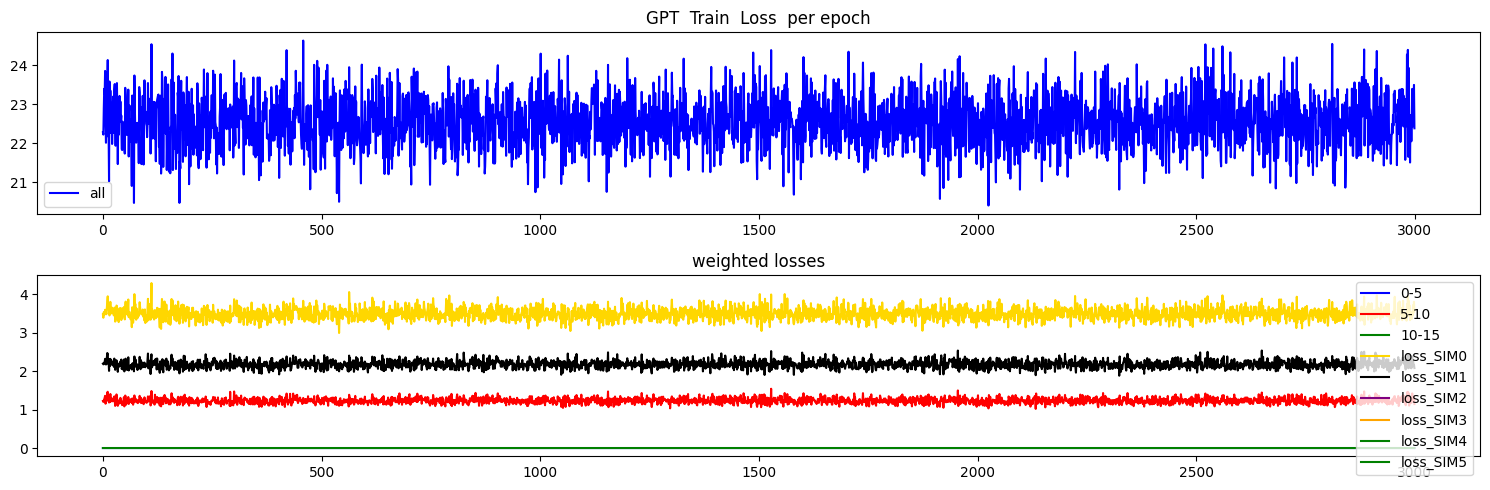

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05590810626745224
Test MSE Loss - SI only 0-5:  0.05730586498975754
Test MSE Loss - SI only 5-10:  0.1757495105266571
Test MSE Loss - SI only 10-15:  0.036175571382045746
mae, mse, rmse, mape, mspe, rse, corr
(0.18761258, 0.055908106, 0.23644894, 3.0629137, 33.676266, 1.3076884)
Testing R**2 - SI only:  -0.7100489421760878
Testing R**2 - SI only:  -0.7100489421760878
Testing R**2 - All features:  0.9722772685655308
Testing R**2 - (f2) - SI full:  -12.139957589566249


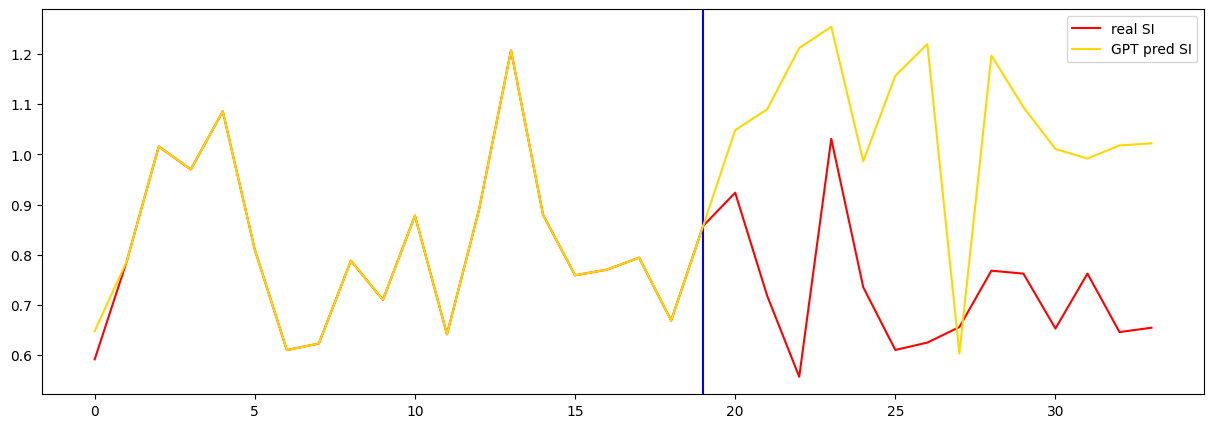

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  24.511953353881836
seq length of pred =  30
[ 3.90380204  2.17550752 12.57472647 24.51194037  0.62430122  0.43088123]
[tensor(1.2486, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0789, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  22.190980911254883
seq length of pred =  30
[ 3.64485311  1.98783925 10.9672716  22.19097182  0.49822595  0.38939904]
[tensor(0.9965, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9983, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  24.696104049682617
seq length of pred =  30
[ 4.04718873  2.16950852 12.65512411 24.696091    0.64872799  0.43558761]
[tensor(1.2975, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1045, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  24.012229919433594
seq length of pred =  30
[ 4.11546199  2.25371269 12.23621354 24.01221725  0.63322338  0.42520477]
[tensor(1.2664, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1189, device='cuda

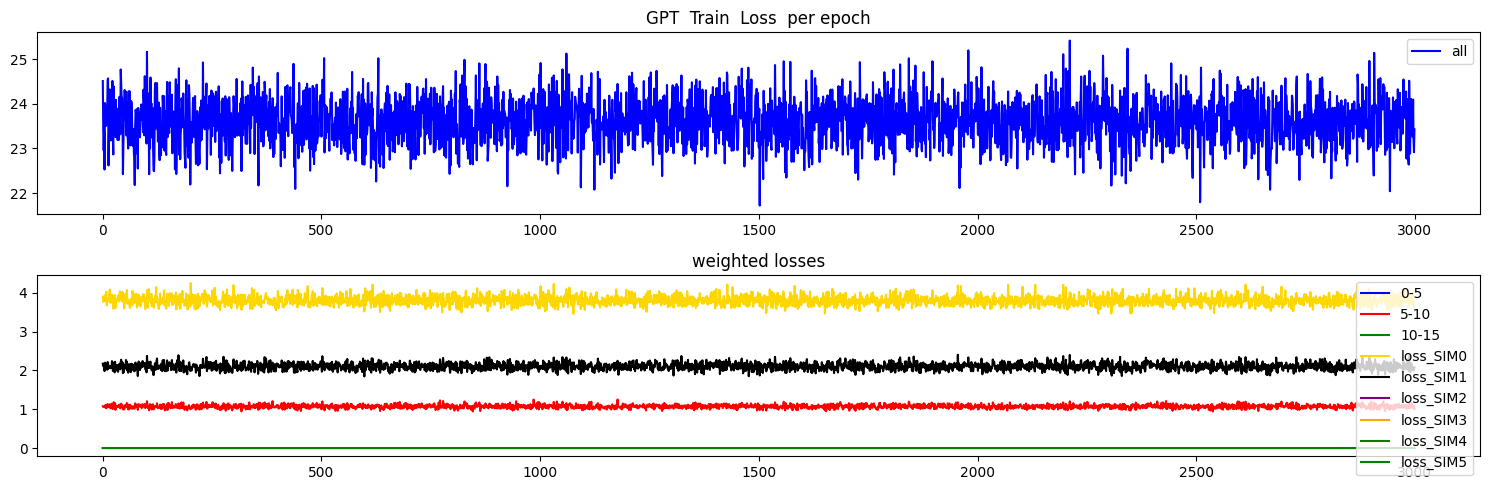

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06471864134073257
Test MSE Loss - SI only 0-5:  0.05730586498975754
Test MSE Loss - SI only 5-10:  0.1757495105266571
Test MSE Loss - SI only 10-15:  0.036175571382045746
mae, mse, rmse, mape, mspe, rse, corr
(0.19178584, 0.06471864, 0.25439858, 2.5819297, 18.622532, 1.4069594)
Testing R**2 - SI only:  -0.9795348899581473
Testing R**2 - SI only:  -0.9795348899581473
Testing R**2 - All features:  0.9760943662992861
Testing R**2 - (f2) - SI full:  -4.657893196936407


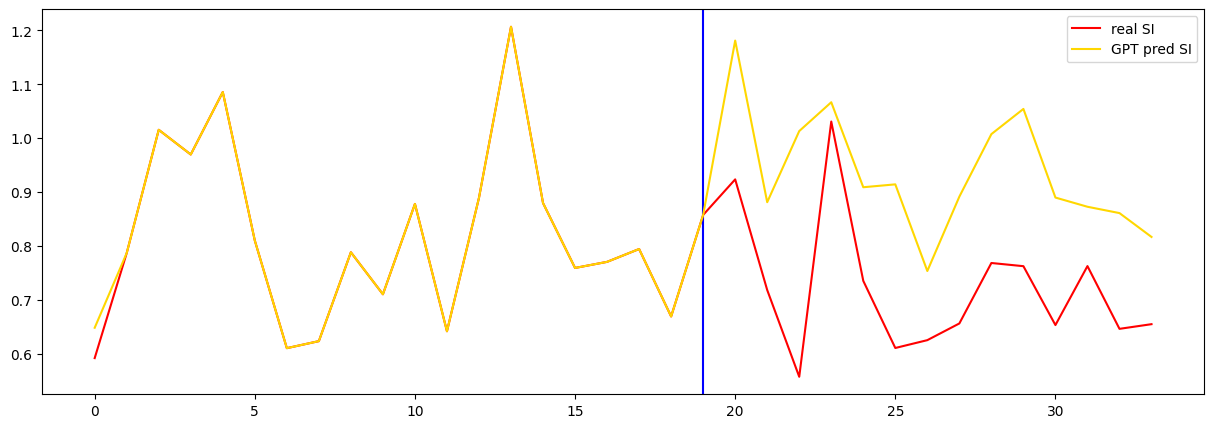

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  22.241527557373047
seq length of pred =  30
[ 3.98128495  1.62680626 11.69966807 22.24151791  0.46419724  0.38825593]
[tensor(0.9284, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2501, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  23.051240921020508
seq length of pred =  30
[ 4.05747512  1.63775407 11.79594477 23.05123205  0.51386704  0.4081876 ]
[tensor(1.0277, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2417, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  23.086042404174805
seq length of pred =  30
[ 3.88272195  1.61014407 11.99160537 23.08603224  0.5080954   0.40804118]
[tensor(1.0162, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2855, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  22.59676170349121
seq length of pred =  30
[ 3.83283509  1.57914002 11.85852847 22.59675183  0.48690955  0.39780078]
[tensor(0.9738, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2223, device='cuda:

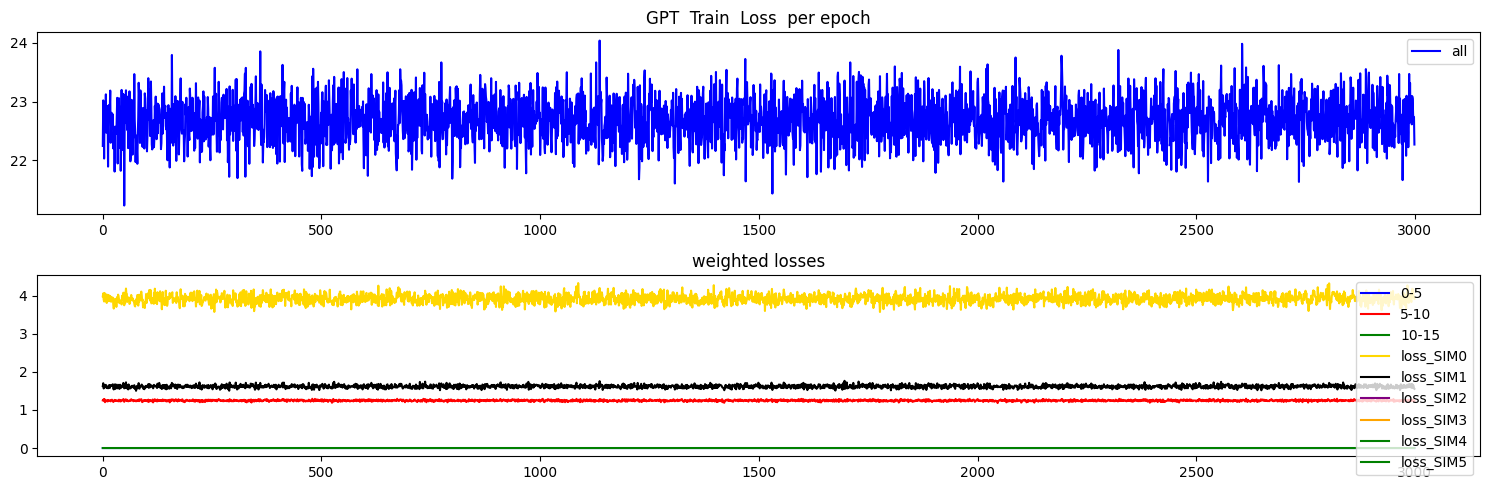

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10950905829668045
Test MSE Loss - SI only 0-5:  0.059092044830322266
Test MSE Loss - SI only 5-10:  0.4320134222507477
Test MSE Loss - SI only 10-15:  0.030225560069084167
mae, mse, rmse, mape, mspe, rse, corr
(0.23000713, 0.10950907, 0.33092156, 5.441486, 278.28714, 1.5114939)
Testing R**2 - SI only:  -1.2846137436125176
Testing R**2 - SI only:  -1.2846137436125176
Testing R**2 - All features:  0.9699679362914536
Testing R**2 - (f2) - SI full:  -1.9427993263288443


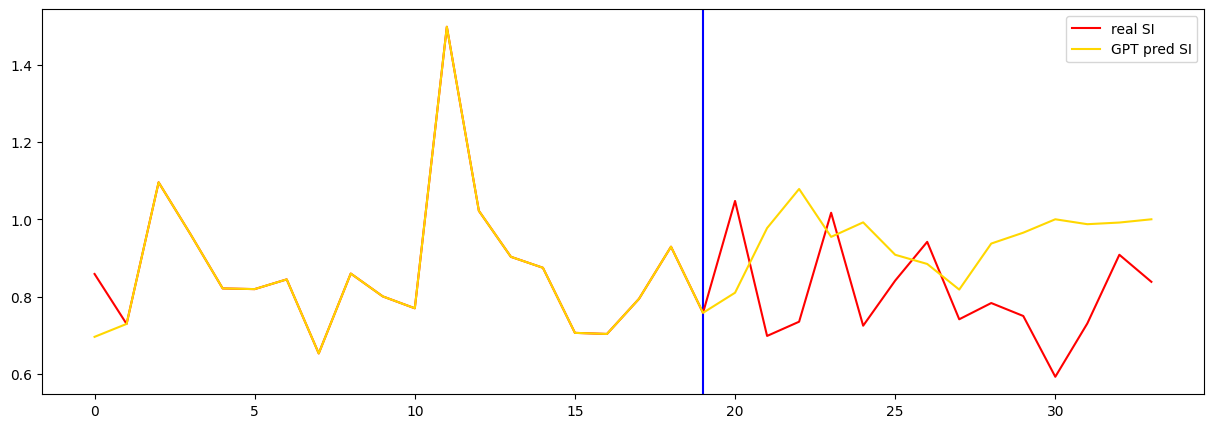

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  22.518796920776367
seq length of pred =  30
[ 3.70863352  2.46094218 11.98836014 22.51878605  0.59851043  0.39681119]
[tensor(1.1970, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3175, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  22.80858612060547
seq length of pred =  30
[ 3.41441671  2.5050385  11.71879209 22.80857515  0.60122138  0.40125575]
[tensor(1.2024, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2643, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  23.0139102935791
seq length of pred =  30
[ 3.5191793   2.46628811 12.29965955 23.01389627  0.64753606  0.40945391]
[tensor(1.2951, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3070, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  21.869094848632812
seq length of pred =  30
[ 3.1604223   2.27323236 11.33899622 21.8690829   0.53746029  0.38364777]
[tensor(1.0749, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2112, device='cuda:0'

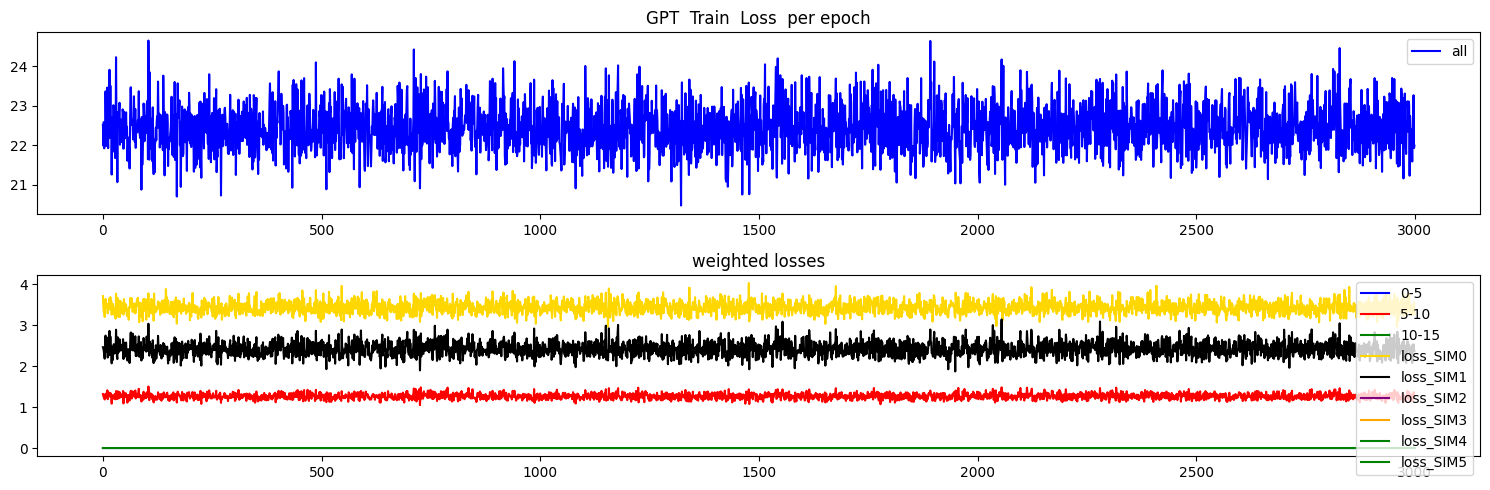

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.12012271583080292
Test MSE Loss - SI only 0-5:  0.059092044830322266
Test MSE Loss - SI only 5-10:  0.43201345205307007
Test MSE Loss - SI only 10-15:  0.03022555634379387
mae, mse, rmse, mape, mspe, rse, corr
(0.25061953, 0.120122716, 0.34658724, 5.6415453, 279.7055, 1.5830474)
Testing R**2 - SI only:  -1.5060388553583977
Testing R**2 - SI only:  -1.5060388553583977
Testing R**2 - All features:  0.966131509216184
Testing R**2 - (f2) - SI full:  -6.607317771679782


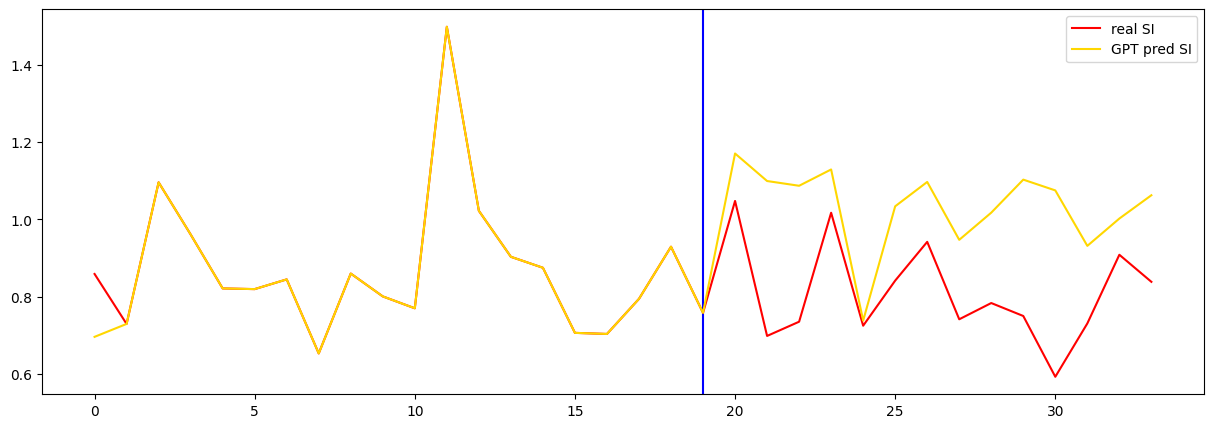

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  23.498767852783203
seq length of pred =  30
[ 3.66163373  2.33817778 11.73338987 23.49875632  0.59954678  0.41330171]
[tensor(1.1991, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1759, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  22.526647567749023
seq length of pred =  30
[ 3.52369809  2.09500361 11.0228538  22.52663698  0.5274847   0.39647108]
[tensor(1.0550, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0510, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  23.123023986816406
seq length of pred =  30
[ 3.32885152  2.23367029 10.97744727 23.12301301  0.5663201   0.40663694]
[tensor(1.1326, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1766, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  23.282039642333984
seq length of pred =  30
[ 3.72714421  2.34321575 11.55634588 23.28202711  0.62326541  0.41473218]
[tensor(1.2465, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1736, device='cuda

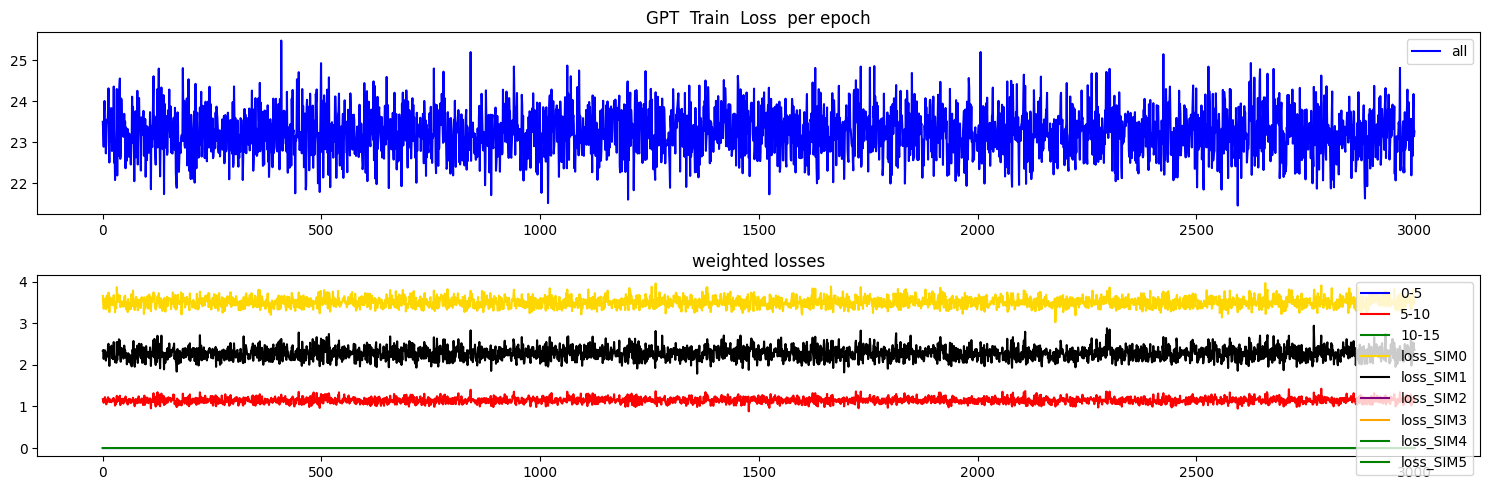

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10670815408229828
Test MSE Loss - SI only 0-5:  0.059092044830322266
Test MSE Loss - SI only 5-10:  0.43201351165771484
Test MSE Loss - SI only 10-15:  0.03022555634379387
mae, mse, rmse, mape, mspe, rse, corr
(0.22436143, 0.106708154, 0.32666215, 5.424599, 278.6125, 1.4920388)
Testing R**2 - SI only:  -1.226179947788971
Testing R**2 - SI only:  -1.226179947788971
Testing R**2 - All features:  0.9871255580198198
Testing R**2 - (f2) - SI full:  -1.7429726436946749


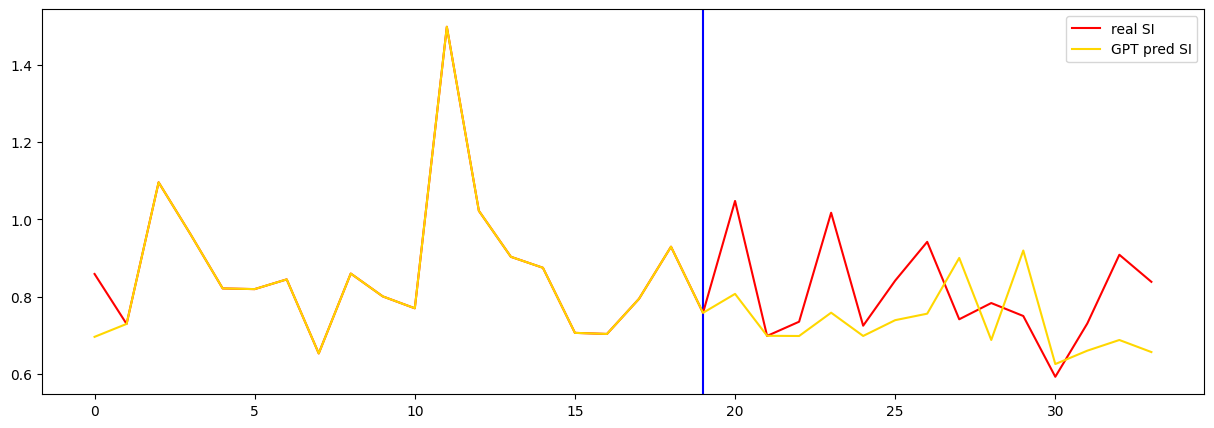

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  22.762893676757812
seq length of pred =  30
[ 3.55689683  1.78393581 11.23039733 22.76288446  0.52016866  0.40393733]
[tensor(1.0403, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0089, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  23.285451889038086
seq length of pred =  30
[ 3.49998766  1.90587702 11.56395397 23.28543985  0.55973207  0.41356809]
[tensor(1.1195, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0250, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  24.269071578979492
seq length of pred =  30
[ 3.67343505  2.18905674 12.13041248 24.26905776  0.62603115  0.42879772]
[tensor(1.2521, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2397, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  23.378684997558594
seq length of pred =  30
[ 3.51131212  1.89252898 11.35315005 23.37867311  0.54337487  0.41391544]
[tensor(1.0867, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0358, device='cuda

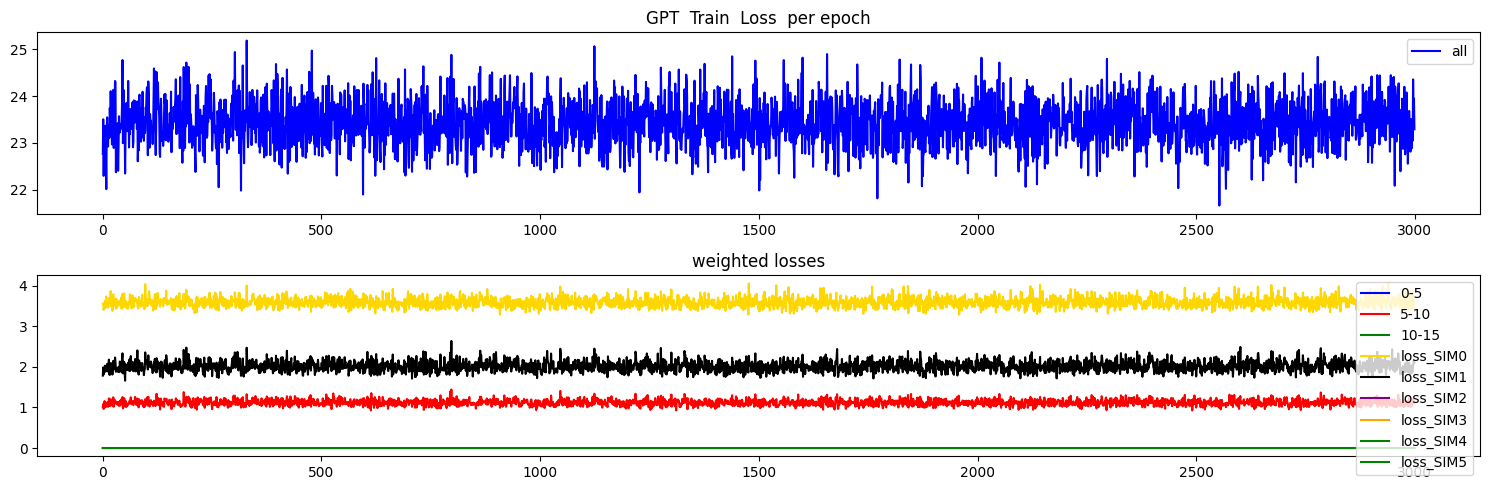

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10716750472784042
Test MSE Loss - SI only 0-5:  0.059092044830322266
Test MSE Loss - SI only 5-10:  0.4320134222507477
Test MSE Loss - SI only 10-15:  0.03022555634379387
mae, mse, rmse, mape, mspe, rse, corr
(0.22885169, 0.1071675, 0.32736447, 5.595052, 279.9216, 1.4952468)
Testing R**2 - SI only:  -1.2357631621479959
Testing R**2 - SI only:  -1.2357631621479959
Testing R**2 - All features:  0.9875250767616511
Testing R**2 - (f2) - SI full:  -0.9943062702759626


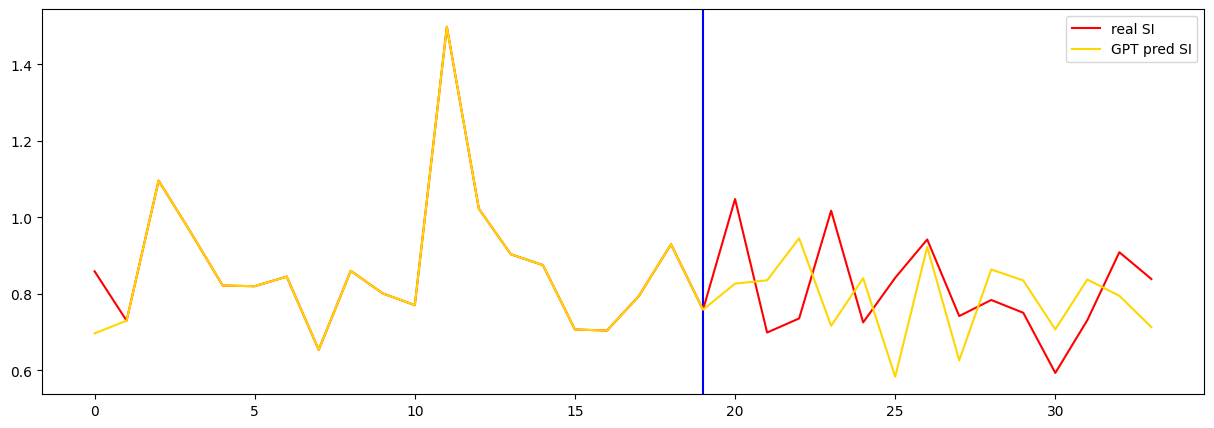

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  21.377878189086914
seq length of pred =  30
[ 4.05685072  2.19918849 11.87171071 21.37786946  0.51635736  0.37382611]
[tensor(1.0327, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2105, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  21.059551239013672
seq length of pred =  30
[ 4.07202336  2.10048733 11.42925591 21.05954119  0.46686931  0.36516796]
[tensor(0.9337, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1628, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  21.936107635498047
seq length of pred =  30
[ 4.19560292  2.34438779 11.86390336 21.93609755  0.5203456   0.38161747]
[tensor(1.0407, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2390, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  21.116426467895508
seq length of pred =  30
[ 3.84825147  2.05864954 11.38252344 21.11641635  0.4675525   0.3683556 ]
[tensor(0.9351, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1459, device='cuda

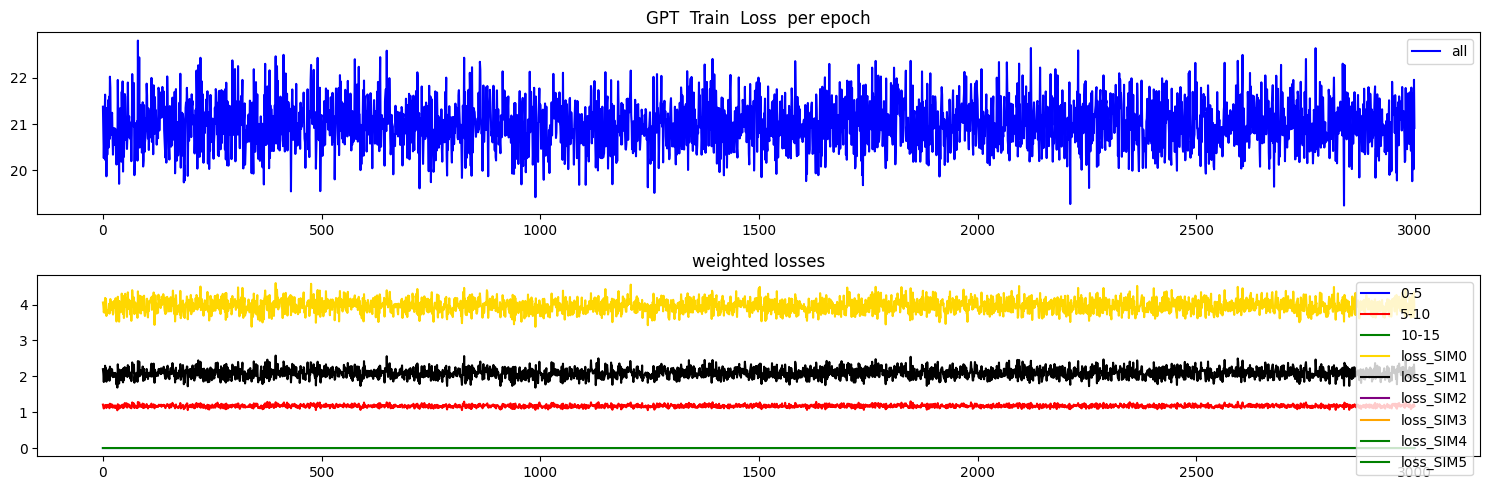

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.15163268148899078
Test MSE Loss - SI only 0-5:  0.015391449443995953
Test MSE Loss - SI only 5-10:  0.314897358417511
Test MSE Loss - SI only 10-15:  0.8725687265396118
mae, mse, rmse, mape, mspe, rse, corr
(0.22399135, 0.15163268, 0.38940042, 2.0769174, 11.430431, 1.5177168)
Testing R**2 - SI only:  -1.3034642474177058
Testing R**2 - SI only:  -1.3034642474177058
Testing R**2 - All features:  0.7712966824090793
Testing R**2 - (f2) - SI full:  -0.07745636436029502


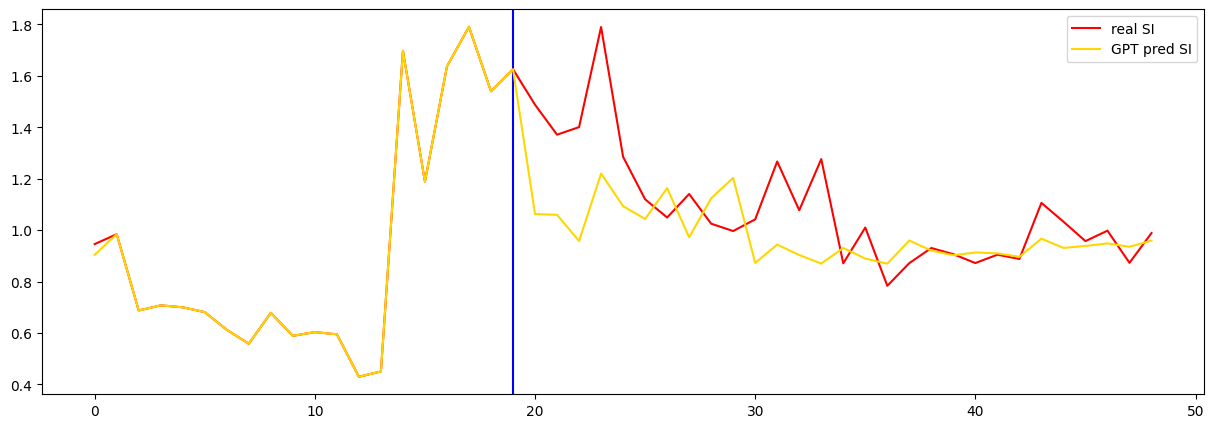

In [34]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  31.536252975463867
seq length of pred =  30
[ 5.8345508   2.93177616 17.57576011 31.53623255  1.06234461  0.56385906]
[tensor(2.1247, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6559, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  32.3078498840332
seq length of pred =  30
[ 5.79074264  2.83653971 18.45634689 32.3078288   1.14416697  0.58476417]
[tensor(2.2883, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.7054, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  30.796619415283203
seq length of pred =  30
[ 5.38056653  2.79977367 16.73559854 30.79659971  0.99080832  0.54623683]
[tensor(1.9816, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5548, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  31.49923324584961
seq length of pred =  30
[ 5.60175798  2.81735858 17.45985612 31.49921275  1.06217123  0.56294666]
[tensor(2.1243, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6601, device='cuda:0'

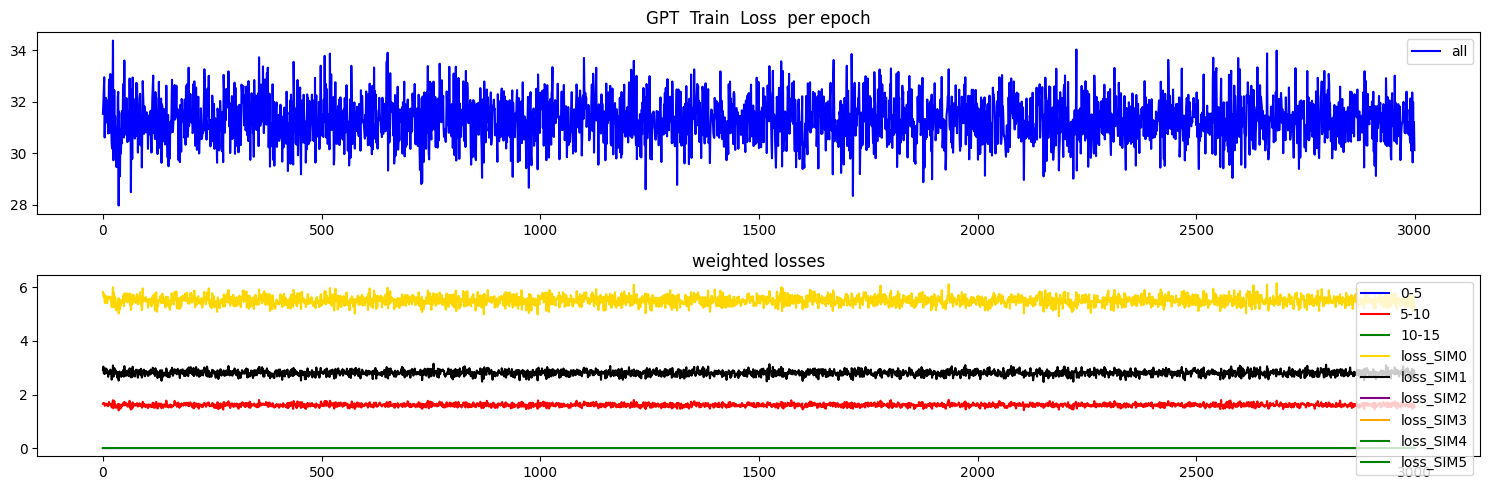

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.1208731085062027
Test MSE Loss - SI only 0-5:  0.305372953414917
Test MSE Loss - SI only 5-10:  0.1828840672969818
Test MSE Loss - SI only 10-15:  0.09502148628234863
mae, mse, rmse, mape, mspe, rse, corr
(0.28481683, 0.1208731, 0.34766808, 73.72376, 248656.33, 1.3770084)
Testing R**2 - SI only:  -0.8961523818160413
Testing R**2 - SI only:  -0.8961523818160413
Testing R**2 - All features:  0.9776068156288319
Testing R**2 - (f2) - SI full:  -0.5673194907879662


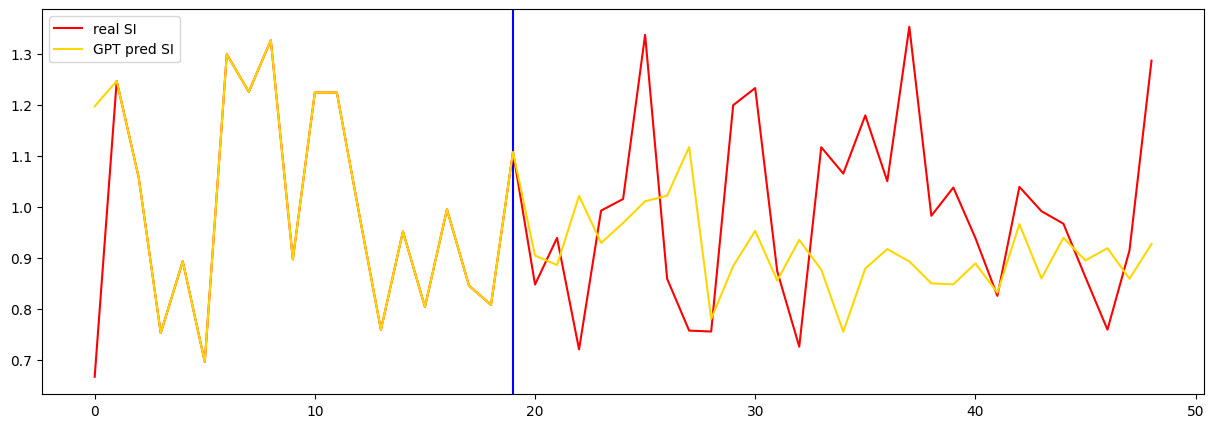

In [35]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  17.48584747314453
seq length of pred =  30
[ 4.94562203  1.97894199 10.64103249 17.48584002  0.34751662  0.302119  ]
[tensor(0.6950, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2072, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  17.772754669189453
seq length of pred =  30
[ 4.88567427  2.17984904 10.91113281 17.77274707  0.38260436  0.30723191]
[tensor(0.7652, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2213, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  17.421066284179688
seq length of pred =  30
[ 5.06182598  1.94090282 10.4537689  17.42105932  0.34529145  0.30109701]
[tensor(0.6906, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2058, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  17.237438201904297
seq length of pred =  30
[ 5.00439939  2.07805893 10.44135811 17.23743126  0.35721803  0.29828057]
[tensor(0.7144, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2200, device='cuda:

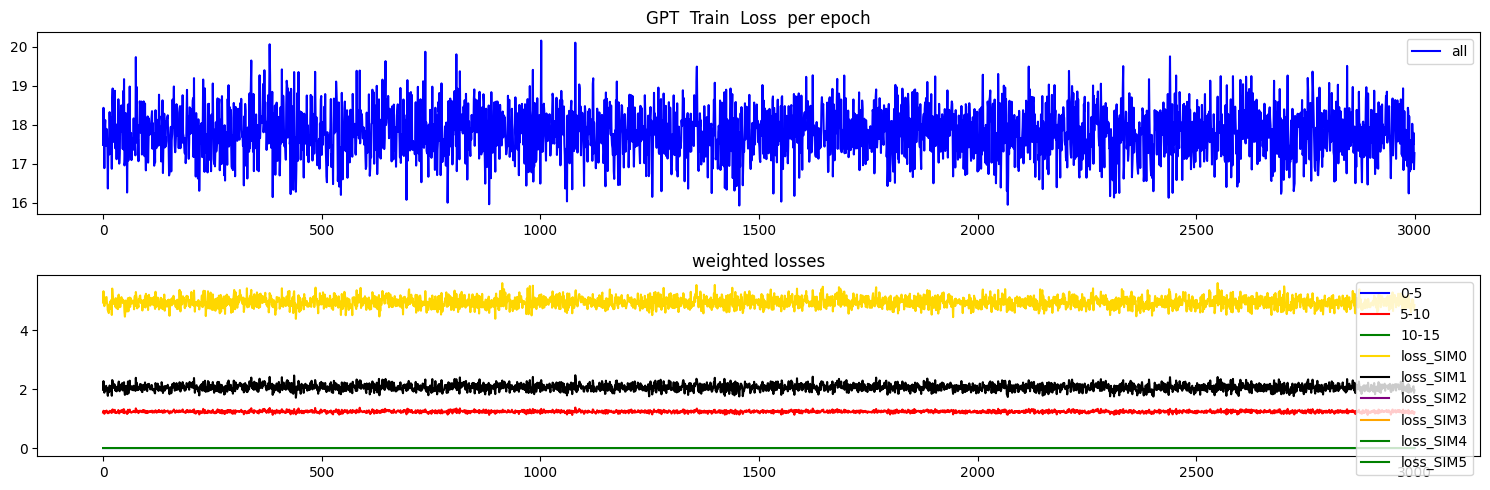

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.12059246003627777
Test MSE Loss - SI only 0-5:  0.26007524132728577
Test MSE Loss - SI only 5-10:  0.03401917591691017
Test MSE Loss - SI only 10-15:  0.26059746742248535
mae, mse, rmse, mape, mspe, rse, corr
(0.25063154, 0.12059246, 0.34726426, 2.0798655, 11.016642, 1.2535092)
Testing R**2 - SI only:  -0.5712850181115032
Testing R**2 - SI only:  -0.5712850181115032
Testing R**2 - All features:  0.8652090992947137
Testing R**2 - (f2) - SI full:  -0.26577810632608556


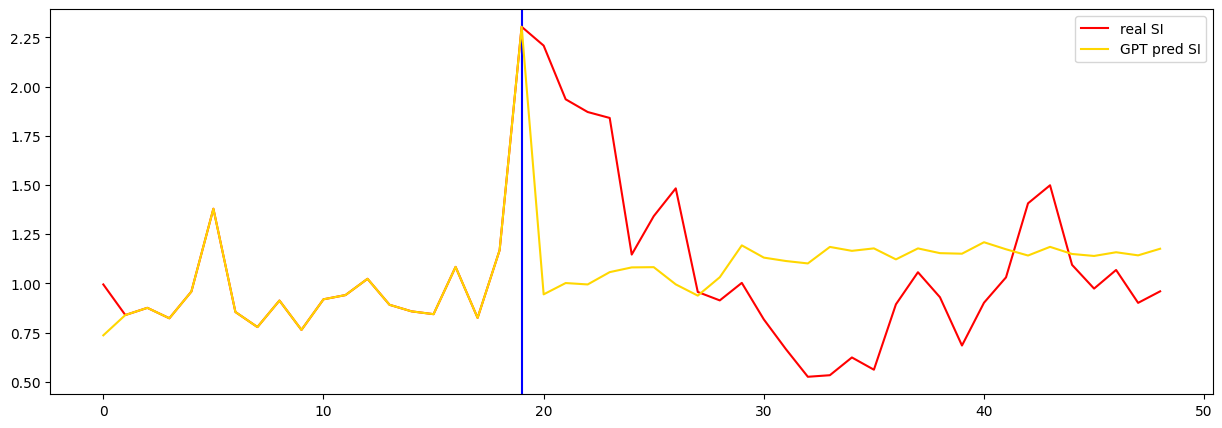

In [36]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  19.838953018188477
seq length of pred =  30
[ 3.8488605   1.77576159 11.19706442 19.83894476  0.39059052  0.34427072]
[tensor(0.7812, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0846, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  20.45394515991211
seq length of pred =  30
[ 4.01415562  1.86825631 11.55380852 20.45393611  0.43268663  0.35499802]
[tensor(0.8654, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1194, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  21.60199737548828
seq length of pred =  30
[ 4.41755663  2.39400899 12.23880699 21.60198725  0.51176244  0.37463425]
[tensor(1.0235, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2571, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  20.657047271728516
seq length of pred =  30
[ 3.91777618  1.98338223 11.69234799 20.65703734  0.45221096  0.35879145]
[tensor(0.9044, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1376, device='cuda:0

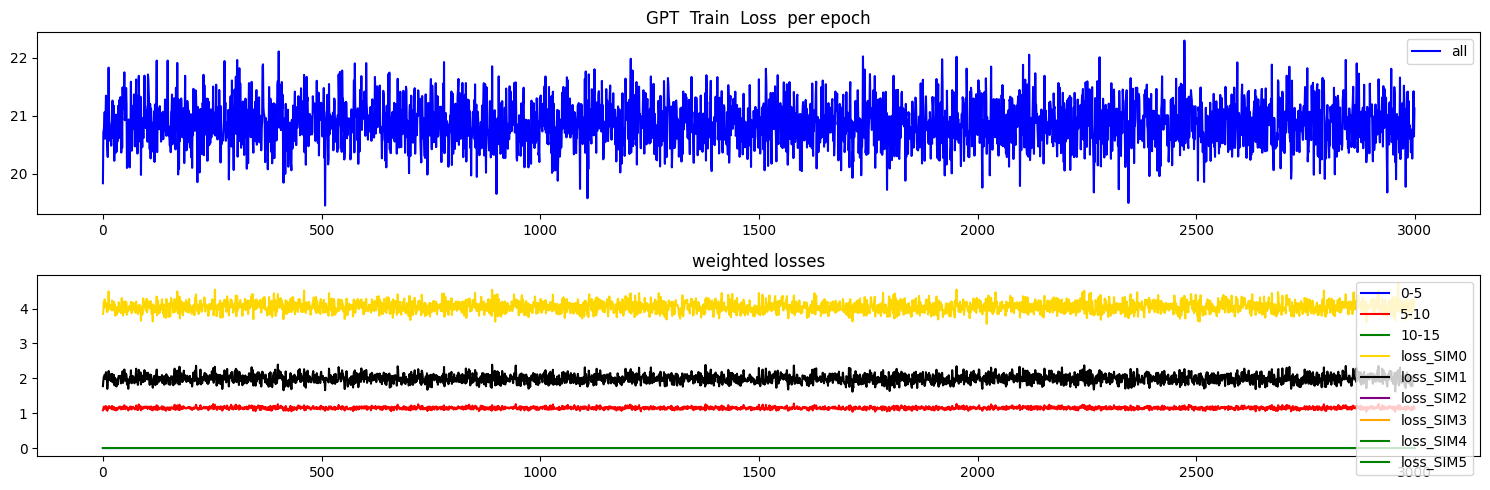

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.14983919262886047
Test MSE Loss - SI only 0-5:  0.017514077946543694
Test MSE Loss - SI only 5-10:  0.9293322563171387
Test MSE Loss - SI only 10-15:  0.26602691411972046
mae, mse, rmse, mape, mspe, rse, corr
(0.22709371, 0.1498392, 0.38709068, 2.0623522, 11.094408, 1.5055716)
Testing R**2 - SI only:  -1.2667457254858139
Testing R**2 - SI only:  -1.2667457254858139
Testing R**2 - All features:  0.6918676281980358
Testing R**2 - (f2) - SI full:  -0.3830339887495944


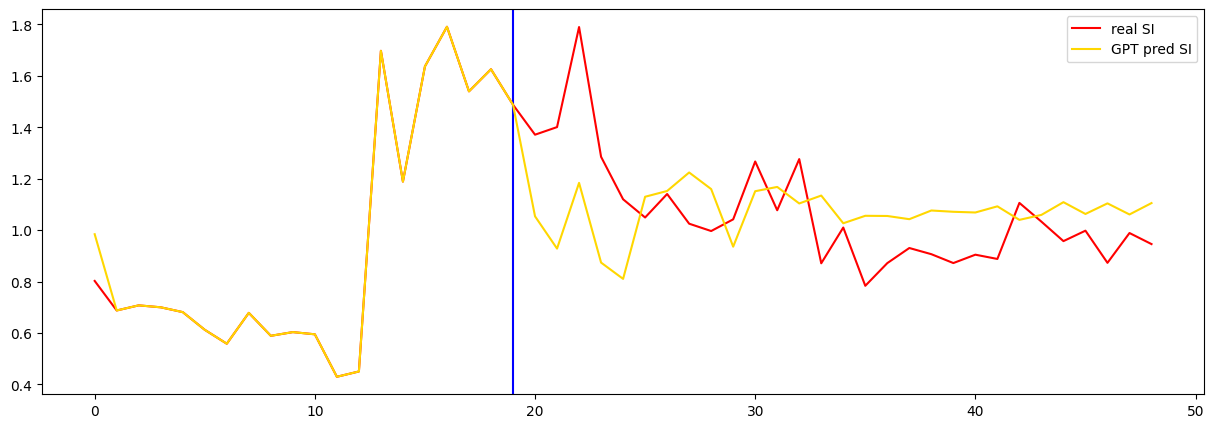

In [37]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  21.005956649780273
seq length of pred =  30
[ 4.94531766  1.79524818 12.15534737 21.00594892  0.42476084  0.36380328]
[tensor(0.8495, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1666, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  21.74358558654785
seq length of pred =  30
[ 5.01872725  1.70759455 12.27951241 21.74357629  0.45082374  0.37831104]
[tensor(0.9016, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1542, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  21.646255493164062
seq length of pred =  30
[ 5.20585989  1.79741647 12.92424724 21.64624536  0.44998048  0.37534842]
[tensor(0.9000, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2086, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  22.755176544189453
seq length of pred =  30
[ 5.31654665  1.94695712 12.50215427 22.75516766  0.49481609  0.3945839 ]
[tensor(0.9896, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2628, device='cuda:

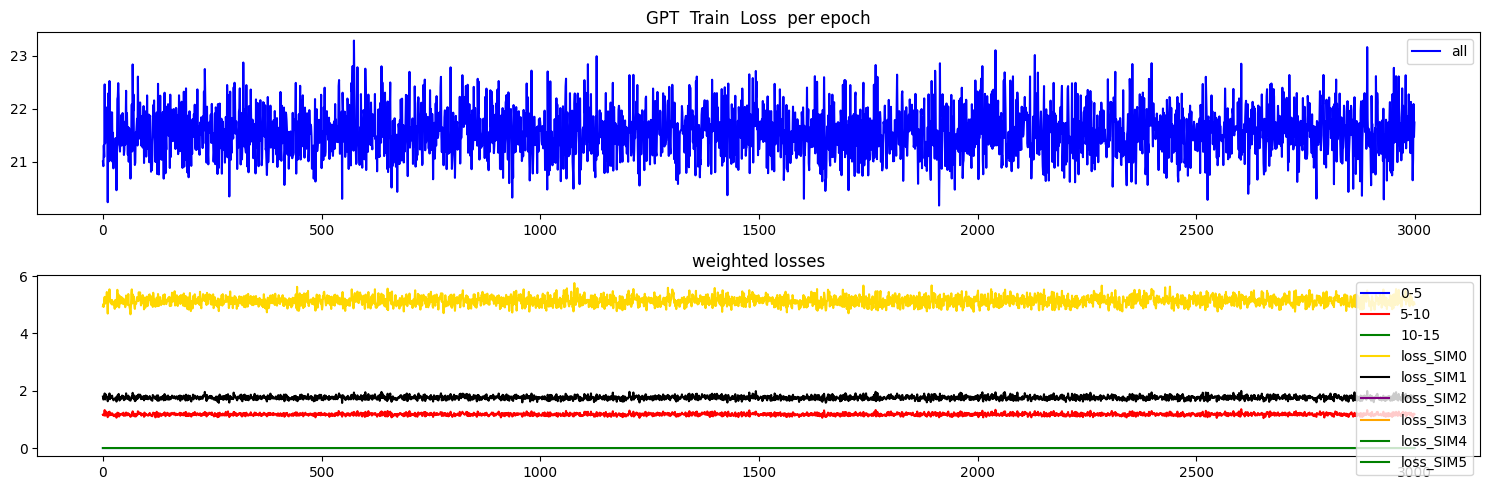

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.048953622579574585
Test MSE Loss - SI only 0-5:  0.09140584617853165
Test MSE Loss - SI only 5-10:  0.021292846649885178
Test MSE Loss - SI only 10-15:  0.0682402029633522
mae, mse, rmse, mape, mspe, rse, corr
(0.18696573, 0.048953623, 0.22125466, 2.8767667, 20.046116, 1.4175844)
Testing R**2 - SI only:  -1.009545557969345
Testing R**2 - SI only:  -1.009545557969345
Testing R**2 - All features:  0.9807479993000944
Testing R**2 - (f2) - SI full:  -0.08119267135424235


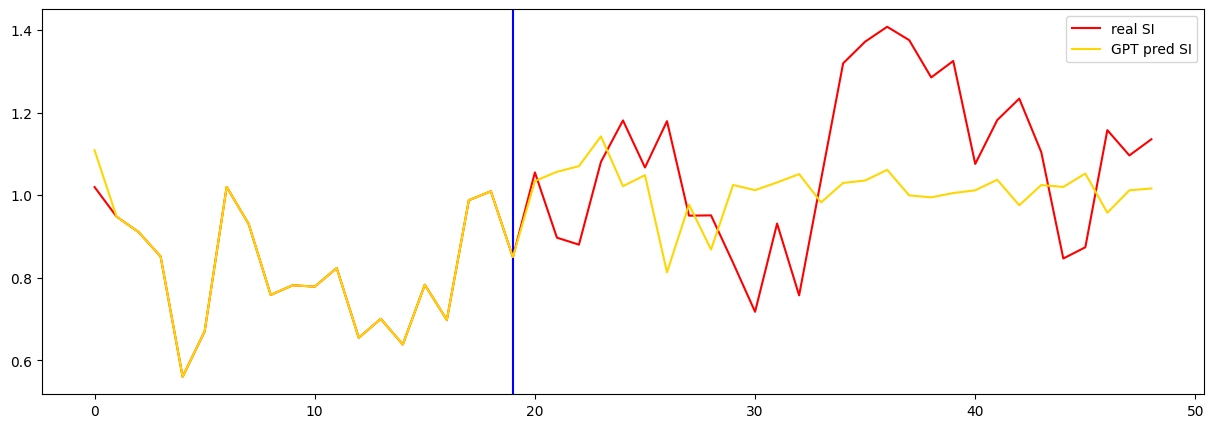

In [38]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  23.597301483154297
seq length of pred =  30
[ 4.0759223   2.36977124 14.46331085 23.59729033  0.58190843  0.41076454]
[tensor(1.1638, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2519, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  22.73181915283203
seq length of pred =  30
[ 3.91992448  2.20577012 13.50363218 22.73180791  0.5346472   0.39557806]
[tensor(1.0693, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2295, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  23.196256637573242
seq length of pred =  30
[ 3.81358325  2.25315285 14.13440448 23.19624433  0.55059518  0.4037671 ]
[tensor(1.1012, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2636, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  23.107471466064453
seq length of pred =  30
[ 4.04887467  2.4682336  14.13980494 23.10745925  0.58434698  0.40366128]
[tensor(1.1687, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2297, device='cuda:

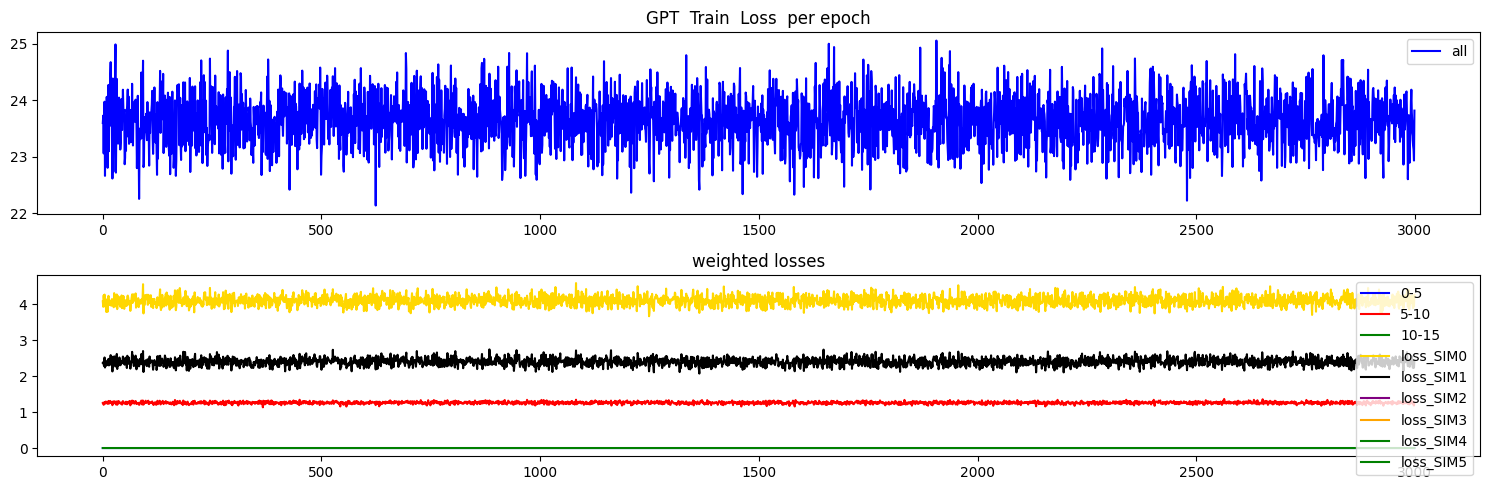

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.08831816911697388
Test MSE Loss - SI only 0-5:  0.02658480778336525
Test MSE Loss - SI only 5-10:  0.27160829305648804
Test MSE Loss - SI only 10-15:  0.16423974931240082
mae, mse, rmse, mape, mspe, rse, corr
(0.22697131, 0.08831816, 0.29718372, 4.5962844, 213.747, 1.3555188)
Testing R**2 - SI only:  -0.8374314107310885
Testing R**2 - SI only:  -0.8374314107310885
Testing R**2 - All features:  0.9450166816302085
Testing R**2 - (f2) - SI full:  -0.8831533743286071


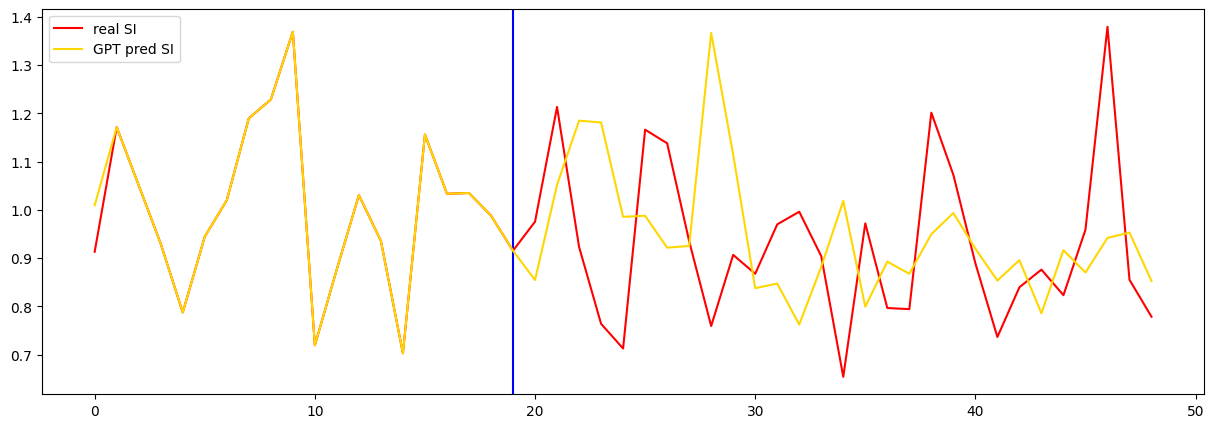

In [39]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  23.301254272460938
seq length of pred =  30
[ 7.58785033  2.74401468 12.0033589  23.30124119  0.63633548  0.40358266]
[tensor(1.2727, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0163, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  24.55275535583496
seq length of pred =  30
[ 7.959379    2.71489652 12.81379887 24.55274175  0.67475675  0.42510441]
[tensor(1.3495, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0580, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  22.951189041137695
seq length of pred =  30
[ 7.2105813   2.5737545  11.36295037 22.95117691  0.59449918  0.39651001]
[tensor(1.1890, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9933, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  21.86687660217285
seq length of pred =  30
[ 6.77768454  2.25520041 10.6171421  21.86686549  0.52601672  0.37946517]
[tensor(1.0520, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9414, device='cuda:0

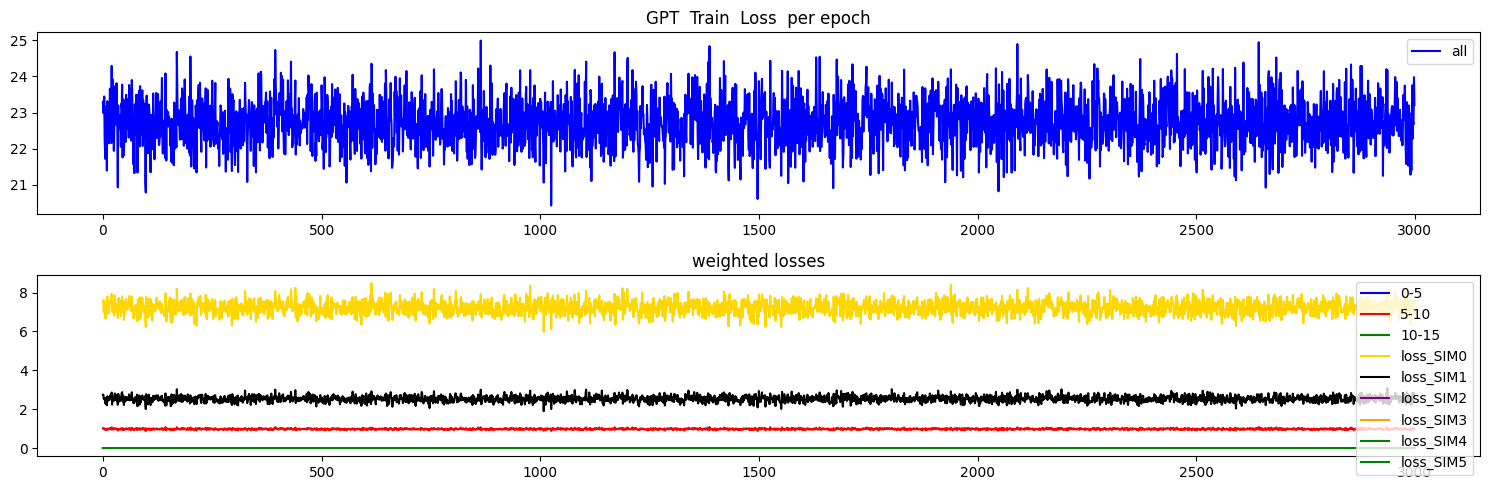

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04529182240366936
Test MSE Loss - SI only 0-5:  0.12192519009113312
Test MSE Loss - SI only 5-10:  0.04934253543615341
Test MSE Loss - SI only 10-15:  0.050602205097675323
mae, mse, rmse, mape, mspe, rse, corr
(0.16008146, 0.045291826, 0.21281876, 1.6878592, 4.186669, 1.2085496)
Testing R**2 - SI only:  -0.46059226984086066
Testing R**2 - SI only:  -0.46059226984086066
Testing R**2 - All features:  0.9521603205935919
Testing R**2 - (f2) - SI full:  0.04669985304307411


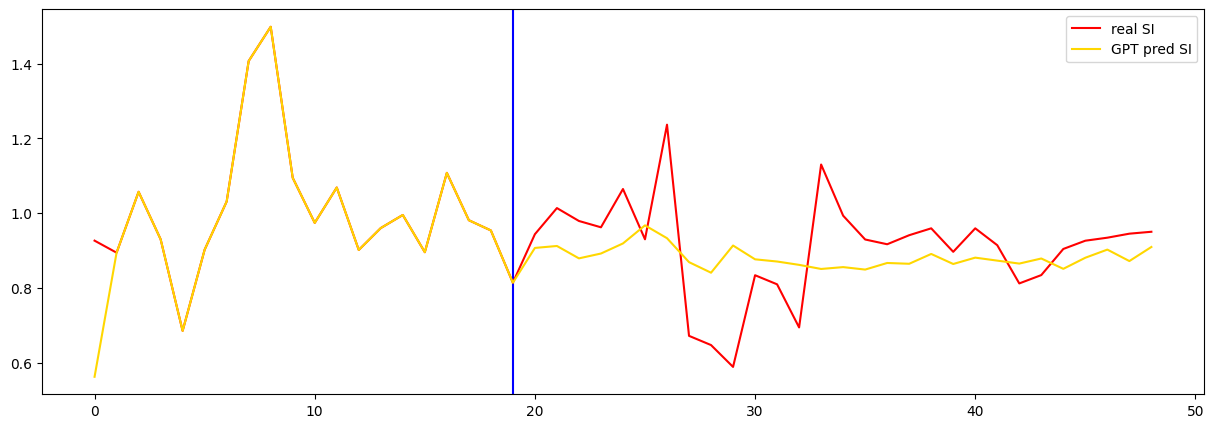

In [40]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [41]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [42]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
